# Machine Learning CA 1

## Team Members: Marie Garron, Eugen Efros, Eduardo Cohen, Sue Amoreira and Lorna Sinclair

## Goal

With machine learning regression techniques, it is possible to predict the future counts of bicycle rentals in London with accuracy greater than 90% based on Weather conditions. To do so, the impact of several independent factors on the number of rentals will first be analysed and prepared. Following this the prepared data will be run through regression machine learning models to carry out predictions.  


# EDA

In [420]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats
import math

#visualisation
import seaborn as sns 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
import mglearn
import matplotlib as mpl
%matplotlib inline 
#plots are shown inline with cell
plt.style.use('ggplot') #style like R studio
mpl.rcParams['axes.unicode_minus'] = False 
#use hyphen in axis
sns.set(color_codes=True)

#preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing

#Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split, cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_predict, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.linear_model import SGDRegressor,Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [421]:
# Import this library to suppress the warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
import warnings
warnings.filterwarnings('ignore')  

In [422]:
bikes_df = pd.read_csv("dataset/london_merged.csv")

## Overview of the dataset

The dataset used for this project was publically available on Kaggle. This dataset is originally sourced from:<br>
Sources: <br>
https://cycling.data.tfl.gov.uk/ freemeteo.com
Collection Methodology <br>
https://cycling.data.tfl.gov.uk/ 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019] 'Powered by TfL Open Data' freemeteo.com <br> weather data https://www.gov.uk/bank-holidays

Information about the Metadata:<br>
<span class="mark">"cnt" - the count of a new bike shares - target variable</span><br>
All dependent features: <br>
"timestamp" - timestamp field for grouping the data<br>
"t1" - real temperature in C<br>
"t2" - temperature in C "feels like"<br>
"hum" - humidity in percentage<br>
"windspeed" - wind speed in km/h<br>
"weathercode" - category of the weather<br>
"isholiday" - boolean field - 1 holiday / 0 non holiday<br>
"isweekend" - boolean field - 1 if the day is weekend<br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>
"weathe_code" category description:<br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br> 2 = scattered clouds / few clouds <br>3 = Broken clouds <br>4 = Cloudy <br>7 = Rain/ light Rain shower/ Light rain <br>10 = rain with thunderstorm <br>26 = snowfall 94 = Freezing Fog

The original data (from the cycling dataset) is grouped by "Start time". This represents the count of new bike rentals grouped by hour. The long-duration rentals are not taken into account.

#### Review the ten first rows of the dataset

In [423]:
bikes_df.head(10)

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   
5  2015-01-04 05:00:00   46  2.0  2.0   93.0         4.0           1.0   
6  2015-01-04 06:00:00   51  1.0 -1.0  100.0         7.0           4.0   
7  2015-01-04 07:00:00   75  1.0 -1.0  100.0         7.0           4.0   
8  2015-01-04 08:00:00  131  1.5 -1.0   96.5         8.0           4.0   
9  2015-01-04 09:00:00  301  2.0 -0.5  100.0         9.0           3.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  
5         0.0         1.0     3.0  
6         0.0         1.0     3.0  
7         0.0         1.0     3.0  
8         0.0         1.0     3.0  
9         0.0         1.0     3.0

In [424]:
print('Number of observations in the dataset:', bikes_df.shape[0])
print('Number of features in the dataset:', bikes_df.shape[1])

Number of observations in the dataset: 17414
Number of features in the dataset: 10


In [425]:
print("Number of duplicate rows:", bikes_df.duplicated().sum())

Number of duplicate rows: 0


In [426]:
#to visualise all columns easier
pd.set_option("display.max_column", 10)
pd.set_option("display.max_row", 150)

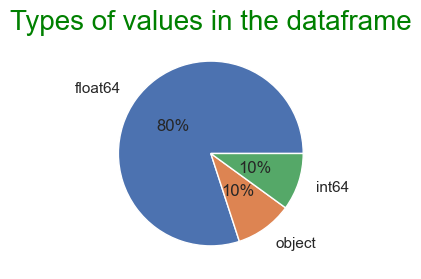

In [427]:
bikes_df.dtypes.value_counts().plot(kind='pie', 
                                    autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,
                                    figsize=(3,3))

plt.title(label="Types of values in the dataframe",fontsize=20, color="green")
plt.ylabel('')
plt.show()

In [428]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


There are no duplicate rows present in the dataset. The type of data for most features is float (decimal) except the feature titled "cnt" that is of type integer as indicated by "int". The feature Timestamp is an "object". All numeric features will be converted into integers. Timestamp will also be prepared and the information extracted into features capable of being processed in a machine learning model.


## Missing values and Date type conversions

The timestamp feature will be converted to allow all useful information for the machine learning algorithm to be extracted.

### Changing the timestamp into numerical values

Review the first 5 rows of the timestamp feature

In [429]:
bikes_datetime = bikes_df.iloc[: , [0]].copy() 
bikes_datetime.head()

timestamp
0  2015-01-04 00:00:00
1  2015-01-04 01:00:00
2  2015-01-04 02:00:00
3  2015-01-04 03:00:00
4  2015-01-04 04:00:00

 **Splitting the timestamp feature into time and date**

In [430]:
bikes_datetime[['Date', 'Time']] = bikes_datetime['timestamp'].str.split(' ', 2, expand=True)
bikes_datetime.drop("timestamp", axis=1, inplace=True)

In [431]:
bikes_datetime.head()

Date      Time
0  2015-01-04  00:00:00
1  2015-01-04  01:00:00
2  2015-01-04  02:00:00
3  2015-01-04  03:00:00
4  2015-01-04  04:00:00

**Splitting the date into year and month - converting time into hours**

In [432]:
bikes_datetime['year'] = pd.DatetimeIndex(bikes_datetime['Date']).year
bikes_datetime['month'] = pd.DatetimeIndex(bikes_datetime['Date']).month
bikes_datetime['Time'] = pd.DatetimeIndex(bikes_datetime['Time']).hour

In [433]:
bikes_datetime = bikes_datetime.drop(columns=["Date"])

In [434]:
bikes_datetime.head()

Time  year  month
0     0  2015      1
1     1  2015      1
2     2  2015      1
3     3  2015      1
4     4  2015      1

**Review of each unique value in the new features**

In [435]:
for col in bikes_datetime:
    print(f'{col:-<25} {bikes_datetime[col].unique()}')

Time--------------------- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
year--------------------- [2015 2016 2017]
month-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12]


**Transforming the hours into categorical values, the 24 hours in the day are to be split into 6 time periods as follows:**
- 1: Late Night
- 2: Early Morning
- 3: Morning
- 4: Afternoon
- 5: Evening
- 6: Night

In [436]:
bikes_datetime['period'] = (bikes_datetime['Time']+4) // 4

In [437]:
print("Categories for the new feature period: ", bikes_datetime["period"].unique())

Catgegories for the new feature period:  [1 2 3 4 5 6]


In [438]:
bikes_datetime.head()

Time  year  month  period
0     0  2015      1       1
1     1  2015      1       1
2     2  2015      1       1
3     3  2015      1       1
4     4  2015      1       2

**All useful information from the time feature is now represented in the period feature therefore Time is dropped**

In [439]:
bikes_datetime.drop("Time", axis=1, inplace =True)

In [440]:
bikes_datetime.head()

year  month  period
0  2015      1       1
1  2015      1       1
2  2015      1       1
3  2015      1       1
4  2015      1       2

**Concatenation of the dataset with the new features extracted from timestamp to the original dataset.**

In [441]:
bikes_df2 = pd.concat([bikes_datetime, bikes_df], axis=1)

In [442]:
bikes_df2.drop("timestamp", axis=1, inplace =True)

In [443]:
print("first 5 rows of the new dataframe:")
bikes_df2.head()

first 5 rows of the new dataframe:


year  month  period  cnt   t1  ...  wind_speed  weather_code  is_holiday  \
0  2015      1       1  182  3.0  ...         6.0           3.0         0.0   
1  2015      1       1  138  3.0  ...         5.0           1.0         0.0   
2  2015      1       1  134  2.5  ...         0.0           1.0         0.0   
3  2015      1       1   72  2.0  ...         0.0           1.0         0.0   
4  2015      1       2   47  2.0  ...         6.5           1.0         0.0   

   is_weekend  season  
0         1.0     3.0  
1         1.0     3.0  
2         1.0     3.0  
3         1.0     3.0  
4         1.0     3.0  

[5 rows x 12 columns]

### Missing Values and "exotic" values

In [444]:
print("Percentage of missing values:", (bikes_df2.isna().sum().sum()/bikes_df2.shape[0]))

Percentage of missing values: 0.0


**Reviewing the unique values in all features to identify any missing values and/or any kind of "exotic" values that would have changed the type.**

In [445]:
for col in bikes_df2:
    print(f'{col:-<25} {bikes_df2[col].unique()}')

year--------------------- [2015 2016 2017]
month-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12]
period------------------- [1 2 3 4 5 6]
cnt---------------------- [ 182  138  134 ... 2842   10 2220]
t1----------------------- [ 3.          2.5         2.          1.          1.5         4.
  5.          6.          6.5         7.          8.          9.
 10.          9.5         8.5        11.          7.5         5.5
  4.5         3.5        11.5        12.         10.5        12.5
 13.         13.5        15.         15.5        14.          0.5
  0.         -0.5        -1.         -1.5        16.         14.5
 16.5        17.5        17.         18.         19.5        20.5
 20.         18.5        21.5        22.5        22.         23.5
 23.         24.         25.         19.         21.         24.5
 25.5        26.         27.         28.5        29.         30.
 33.         32.         31.5        33.5        34.         29.5
 27.5        26.5        28.         30.5 

**Several values identified that are to be rounded to allow for the conversion to integer type of data**

In [446]:
bikes_df2[["t1", "t2", "wind_speed", "hum"]] = bikes_df2[["t1", "t2", "wind_speed", "hum"]].round(1)

**Rounded Unique values for column hum (humidity):**

In [447]:
print(bikes_df2["hum"].unique())

[ 93.   96.5 100.   87.   90.   84.   81.   79.   82.   84.5  90.5  85.
  73.5  69.   71.   76.   88.   68.5  78.5  71.5  62.   80.   74.5  82.5
  87.5  79.5  69.5  67.   63.   67.5  77.   72.   68.   58.   54.   48.
  51.5  55.   57.   66.   72.5  75.   70.   63.5  61.   59.   55.5  56.
  60.   64.   64.5  94.   65.5  76.5  52.   53.   51.   73.   77.5  65.
  78.   86.5  86.   83.   89.5  75.5  62.5  91.   70.5  66.5  59.5  81.5
  50.   61.5  53.5  49.5  46.5  44.5  46.   48.5  45.5  43.   40.   35.5
  47.5  49.   47.   52.5  45.   74.   44.   41.   39.5  26.   27.   31.
  36.5  42.5  50.5  41.5  72.8  35.   54.5  93.5  97.   33.   39.   37.
  32.   36.   37.5  43.5  38.5  42.   38.   40.5  33.5  29.5  29.   32.5
  60.5  56.5  57.5  28.5  85.5  34.   34.5  30.   80.5  58.5  30.5  24.
  20.5  28.   23.5  25.   26.5  25.5  88.5  83.5  23.   31.5  98. ]


**Apart from t1, t2, humidity and wind speed, that contain decimal values, the others features can be converted into an integer. Integer features require less memory and it is easier to carry out the required feature engineering before developing the machine learning model as they are categorical values**

In [448]:
bikes_df2[["weather_code", "is_holiday", "is_weekend", "season"]] = bikes_df2[
    ["weather_code", "is_holiday", "is_weekend", "season"]].astype(int)

**New feature types**

In [449]:
bikes_df2.dtypes

year              int64
month             int64
period            int64
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int32
is_holiday        int32
is_weekend        int32
season            int32
dtype: object

# Visualisation

## Target variable

In [450]:
target= bikes_df2.iloc[: , [3]].copy() 
target.head()

cnt
0  182
1  138
2  134
3   72
4   47

In [451]:
print("Statistical analysis of the target:")
target.describe().T.round(2)

Statistic analyse of the target:


count    mean      std  min    25%    50%      75%     max
cnt  17414.0  1143.1  1085.11  0.0  257.0  844.0  1671.75  7860.0

In [452]:
print("skewness of the feature")
round(target.skew(), 2)

skewness of the feature


cnt    1.33
dtype: float64

**The maximum value of bikes rented is up to 7900 for a particular observation. The average is approximately 1000, it can be seen that the data is skewed as there is a right-tail. The target variable follows an exponential distribution. The range of the variable is high, from zero to approximately 8000, so a logarithmic function will be used to visualise the data.
<br>Note: The skewness is for the normal data set, not log (data).**

In [453]:
log_cnt = np.log10(target['cnt'] + 1)

 Target distribution  



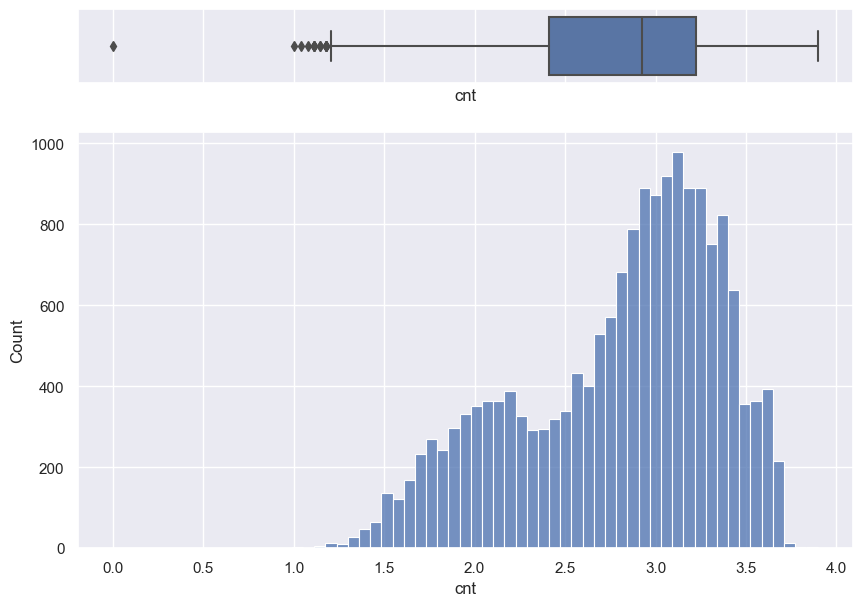

In [454]:
print("\033[1;32m Target distribution  \n")

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(target, x=log_cnt, ax=ax_box)
sns.histplot(data=target, x=log_cnt, ax=ax_hist)

plt.show()

In [455]:
print(f'Count of unique values for the target:',target["cnt"].nunique())

Count of unique values for the target: 3781


**With 3781 values, the target can be considered a continuous variable. Therefore a regression Machine learning model will be selected.**

## Independant variables 

In [456]:
print( f'The first row of the dataset:\n')
bikes_df2.head(6)

The first row of the dataset:



year  month  period  cnt   t1  ...  wind_speed  weather_code  is_holiday  \
0  2015      1       1  182  3.0  ...         6.0             3           0   
1  2015      1       1  138  3.0  ...         5.0             1           0   
2  2015      1       1  134  2.5  ...         0.0             1           0   
3  2015      1       1   72  2.0  ...         0.0             1           0   
4  2015      1       2   47  2.0  ...         6.5             1           0   
5  2015      1       2   46  2.0  ...         4.0             1           0   

   is_weekend  season  
0           1       3  
1           1       3  
2           1       3  
3           1       3  
4           1       3  
5           1       3  

[6 rows x 12 columns]

### Quick overview of the categorical features per year

**Review of correlation between all features to identify any additional features to be explored.**

Text(0.5, 1.08, 'Pairplot for all categorical features')

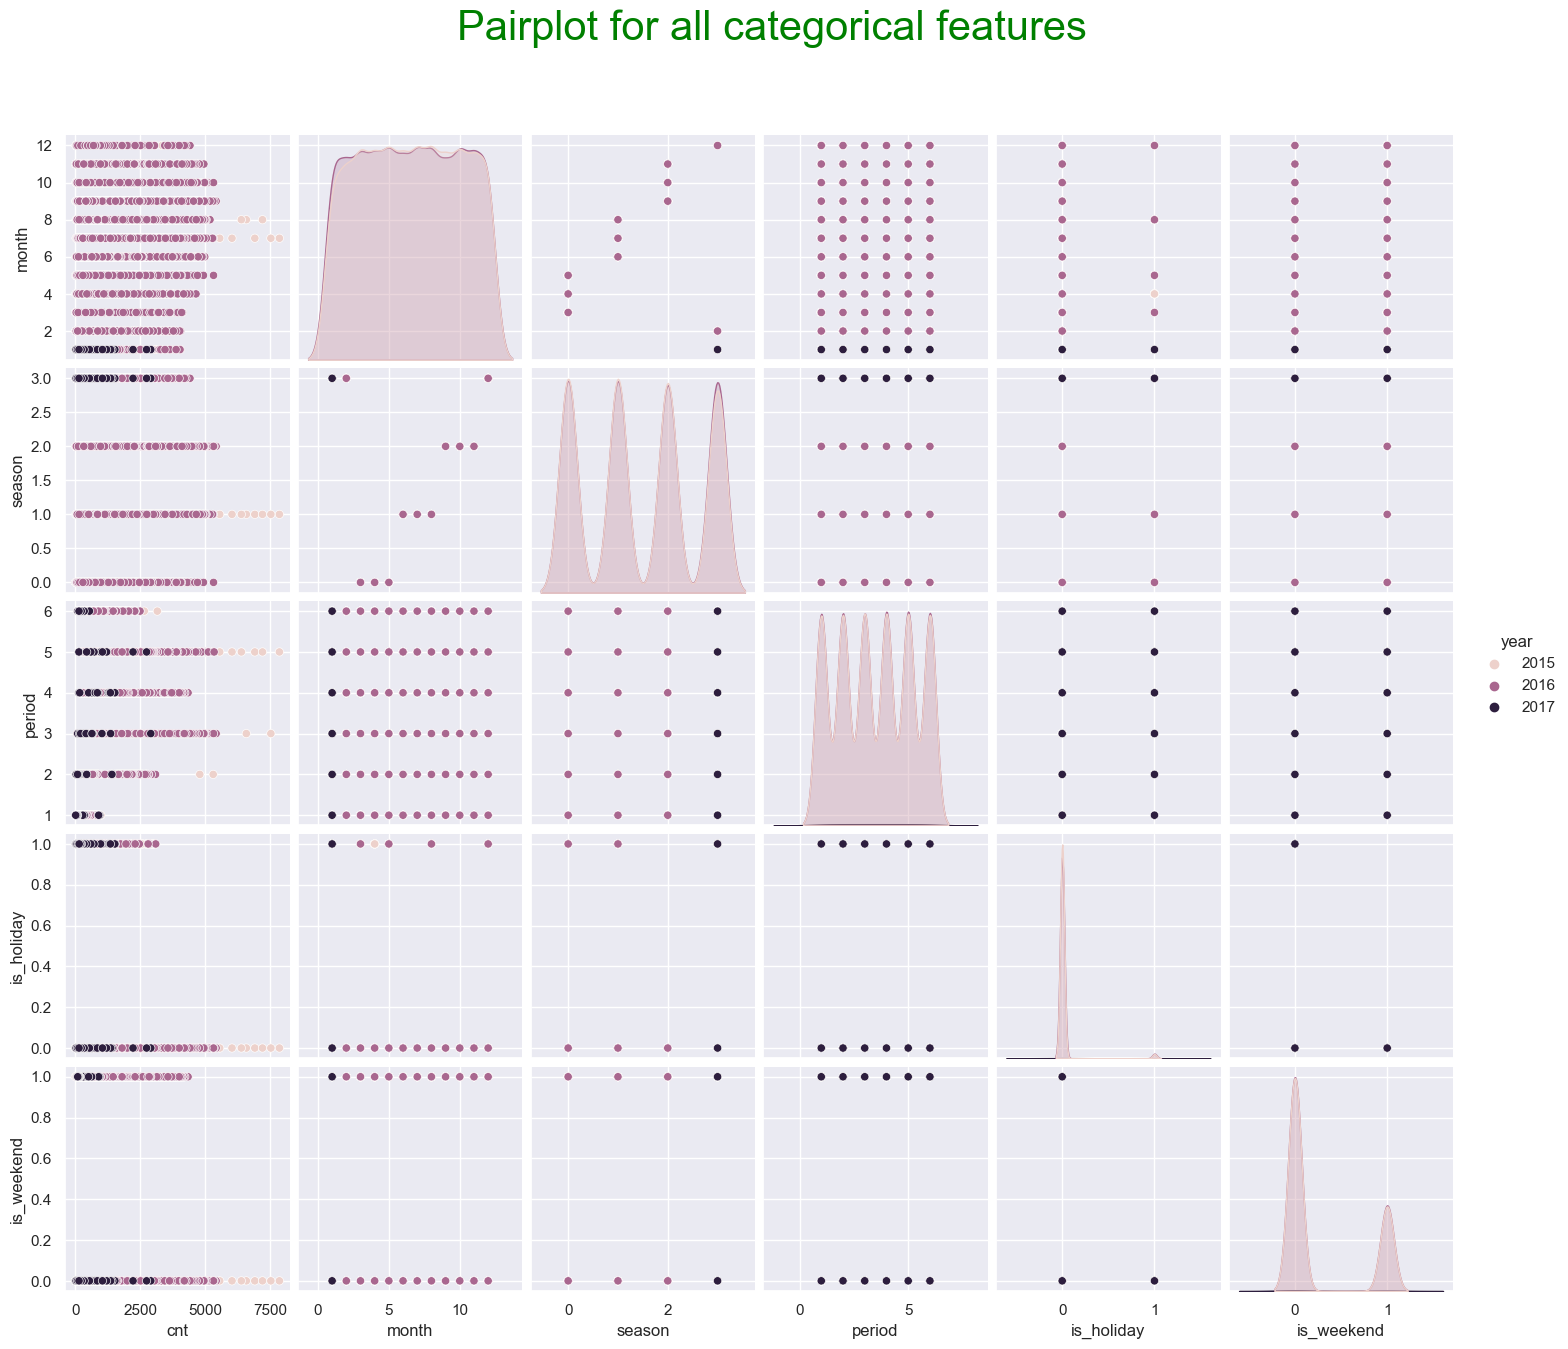

In [457]:
sns.color_palette("hls", 8)
g = sns.pairplot(bikes_df2, hue="year",
             x_vars=["cnt", "month","season", "period", "is_holiday", "is_weekend"],
             y_vars=["month","season", "period", "is_holiday", "is_weekend"]
            )
g.fig.suptitle("Pairplot for all categorical features",fontsize=30, color="green", y=1.08)

### Quick overview of the numerical features per year

**Note:** weather code has been included as it relates to the weather. 

Text(0.5, 1.08, 'Pairplot for all numerical features')

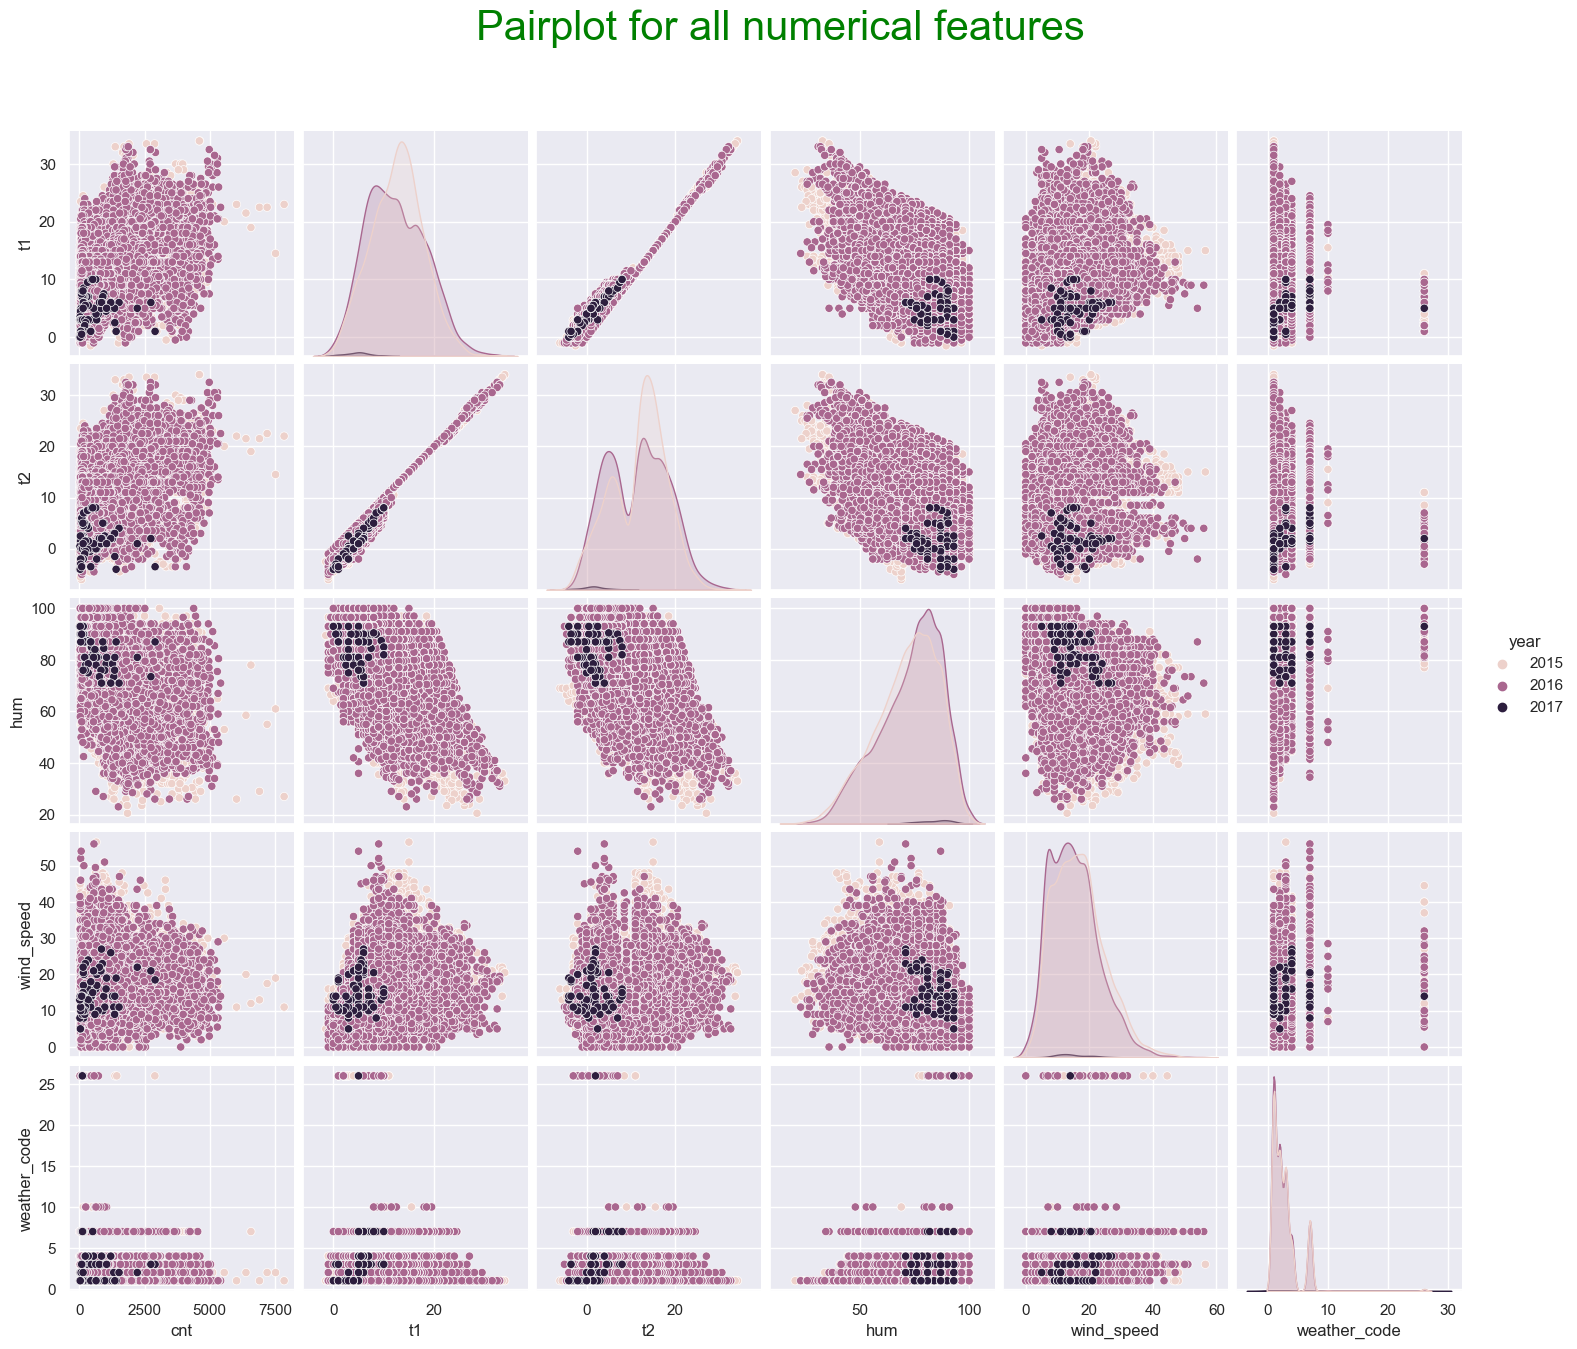

In [458]:
g = sns.pairplot(bikes_df2, hue="year",
             x_vars=["cnt", 't1', 't2', 'hum', 'wind_speed','weather_code'],
             y_vars=[ 't1', 't2', 'hum', 'wind_speed','weather_code']
            )
g.fig.suptitle("Pairplot for all numerical features",fontsize=30, color="green", y=1.08)

All features, except for the wind speed, are not normally distributed and are skewed. To identify a pattern between the features the next step is a correlation matrix. As there is a non normal distribution the **pearson Correlation** is selected.

### Correlation matrix of all features

In [459]:
print("\033[1;32m Pearson Correlation Matrix amongst the dataset\n")
corr0 = bikes_df2
corr0 = corr0.corr(method='pearson')
corr0

 Pearson Correlation Matrix amongst the dataset



year     month    period       cnt        t1  ...  \
year          1.000000 -0.026547  0.000499  0.010046 -0.037960  ...   
month        -0.026547  1.000000 -0.000267  0.063757  0.332711  ...   
period        0.000499 -0.000267  1.000000  0.341065  0.170819  ...   
cnt           0.010046  0.063757  0.341065  1.000000  0.388798  ...   
t1           -0.037960  0.332711  0.170819  0.388798  1.000000  ...   
t2           -0.044972  0.368366  0.155917  0.369035  0.988344  ...   
hum           0.072443  0.113149 -0.299379 -0.462901 -0.447782  ...   
wind_speed   -0.094740 -0.086383  0.143324  0.116295  0.145471  ...   
weather_code -0.009234 -0.033253 -0.042472 -0.166633 -0.097114  ...   
is_holiday    0.034631 -0.011511 -0.000298 -0.051698 -0.042233  ...   
is_weekend    0.003049 -0.005406  0.001875 -0.096499 -0.005343  ...   
season        0.024400  0.203249  0.000014 -0.116180 -0.285851  ...   

              wind_speed  weather_code  is_holiday  is_weekend    season  
year           -0.094740     -0.009234    0.034631    0.003049  0.024400  
month          -0.086383     -0.033253   -0.011511   -0.005406  0.203249  
period          0.143324     -0.042472   -0.000298    0.001875  0.000014  
cnt             0.116295     -0.166633   -0.051698   -0.096499 -0.116180  
t1              0.145471     -0.097114   -0.042233   -0.005343 -0.285851  
t2              0.088409     -0.098385   -0.040051   -0.008511 -0.285900  
hum            -0.287788      0.334750    0.032068    0.028099  0.290381  
wind_speed      1.000000      0.124803   -0.002606    0.011480  0.010305  
weather_code    0.124803      1.000000    0.012939    0.042362  0.098976  
is_holiday     -0.002606      0.012939    1.000000   -0.094898 -0.032488  
is_weekend      0.011480      0.042362   -0.094898    1.000000  0.001067  
season          0.010305      0.098976   -0.032488    0.001067  1.000000  

[12 rows x 12 columns]

<Figure size 800x800 with 0 Axes>

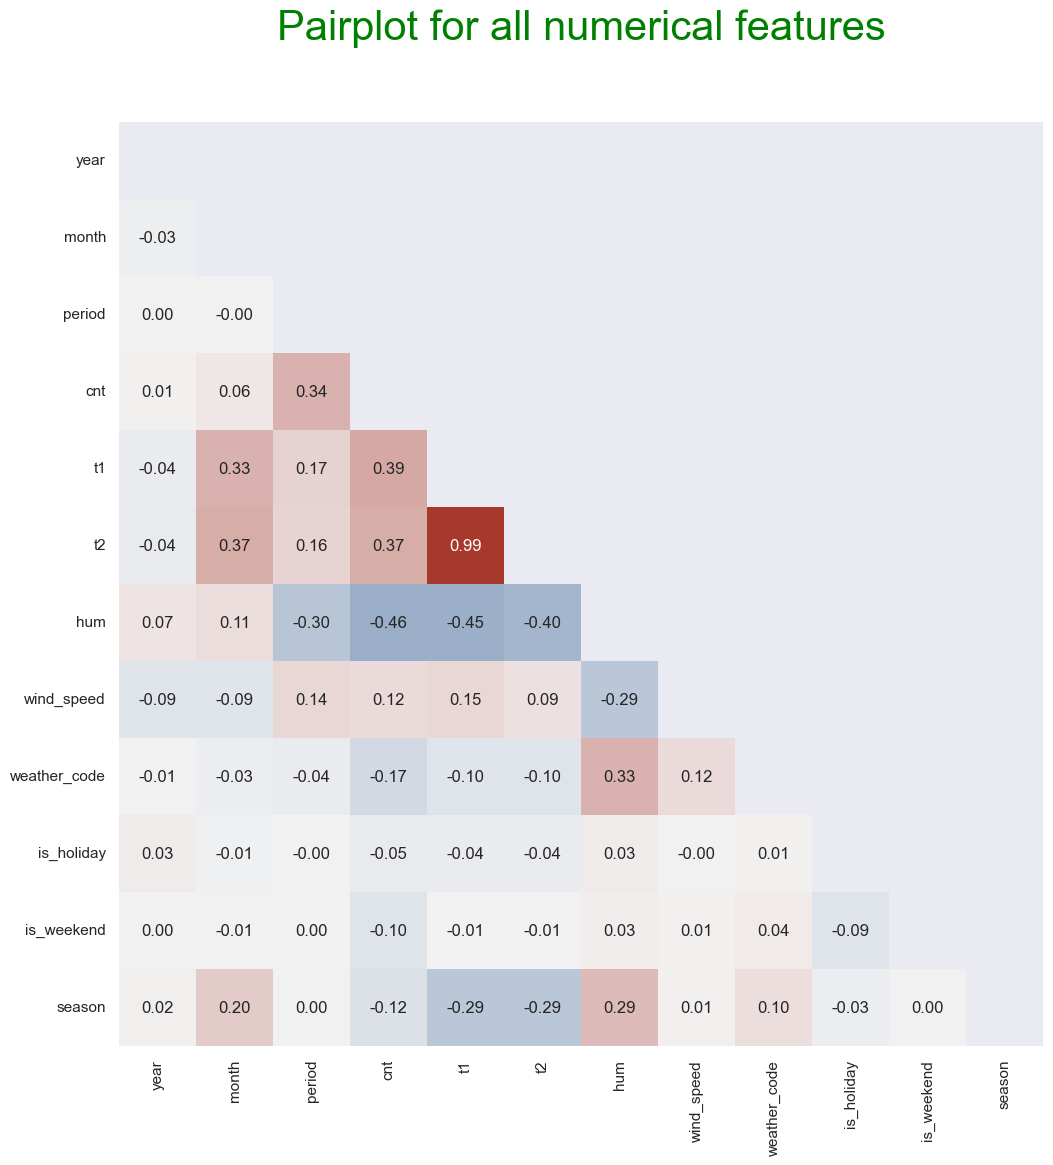

In [460]:
plt.figure(figsize=(8,8))
# Create a mask
mask = np.triu(np.ones_like(corr0, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
g =sns.heatmap(corr0, mask=mask, center=0, cbar=False,annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title("Pairplot for all numerical features",fontsize=30, color="green", y=1.08) 
plt.show()

**Correlation does not necessarily imply causation**<br>
There is a limited number of strong correlations. The highest positive is 0.68 between t1 and cnt. A positive linear relationship exists between t2, period, month and t2. The best correlation is amongst the weather-related features, as expected.
The Period feature indicates that there is a moderate positive relationship between the variables.
A negative linear relationship exists for the following pairs, weekend/cnt, humidity/cnt, holiday/cnt and weekend/cnt.<br> 
The relationship between these variables is negative, which indicates that, when it is the weekend, cnt decreases. In other words, holidays or weekends impact bike rentals.<br>
For the feature year, the correlation matrix confirms that this variable does not add value. Therefore, this feature will be removed.

The correlation is not very high, therefore, the Machine learning may be complex and may not achieve the desired accuracy.

### Visualisation for dependent variables linked to the weather 

**Reminder:**"weather_code" category description: <br> 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity <br>2 = scattered clouds / few clouds <br>3 = Broken clouds <br>4 = Cloudy <br>7 = Rain/ light Rain shower/ Light rain <br>10 = rain with thunderstorm <br>26 = snowfall <br>94 = Freezing Fog

In [461]:
print("\033[1;32m Statistical analysis of variables linked to the weather \n")

bikes_df2[["t1", "t2", "hum", "wind_speed", "weather_code"]] .describe().T

 Statistical analysis of variables linked to the weather 



count       mean        std   min   25%   50%   75%    max
t1            17414.0  12.468089   5.571818  -1.5   8.0  12.5  16.0   34.0
t2            17414.0  11.520834   6.615145  -6.0   6.0  12.5  16.0   34.0
hum           17414.0  72.324957  14.313186  20.5  63.0  74.5  83.0  100.0
wind_speed    17414.0  15.913070   7.894572   0.0  10.0  15.0  20.5   56.5
weather_code  17414.0   2.722752   2.341163   1.0   1.0   2.0   3.0   26.0

In [462]:
print("\033[1;32m Skewness of the numerical values \n")

round(bikes_df2[["t1", "t2", "hum", "wind_speed"]] .skew(), 2)

 Skewness of the numerical values 



t1            0.20
t2           -0.06
hum          -0.57
wind_speed    0.67
dtype: float64

In [463]:
num = ["cnt","t1", "t2", "hum", "wind_speed", "weather_code"]
num_df = bikes_df2[num].copy()

All numerical features ( plus the weather code) are stored in one subset.

In [464]:
print("The first row of the subset\n")
num_df.head()

The first row of the subset



cnt   t1   t2    hum  wind_speed  weather_code
0  182  3.0  2.0   93.0         6.0             3
1  138  3.0  2.5   93.0         5.0             1
2  134  2.5  2.5   96.5         0.0             1
3   72  2.0  2.0  100.0         0.0             1
4   47  2.0  0.0   93.0         6.5             1

#### Distribution of temperature variables: t1 and t2 

**Reminder:** t2 is the apparent temperature or "feels-like" temperature

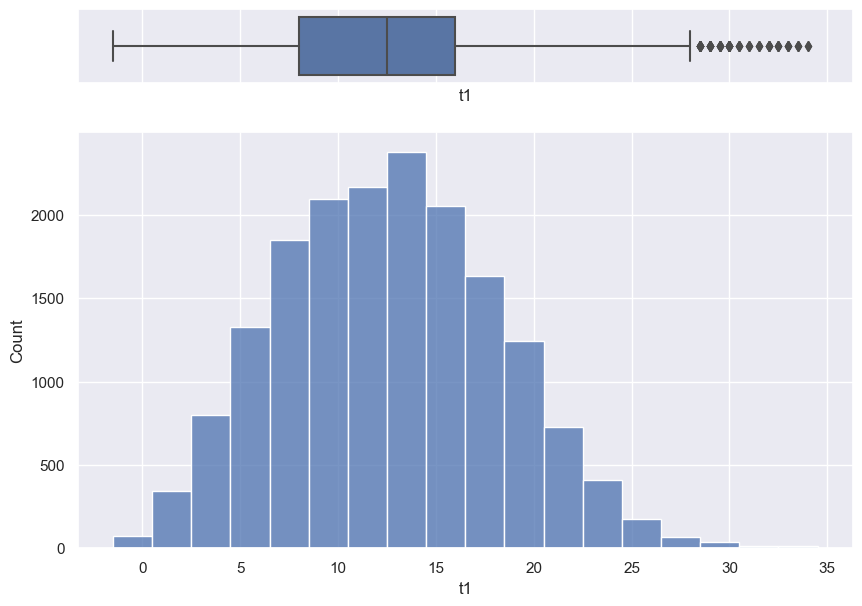

<Figure size 400x400 with 0 Axes>

In [465]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="t1", ax=ax_box)
sns.histplot(data=num_df, x="t1", ax=ax_hist, binwidth=2)

plt.figure(figsize=(4,4))
plt.show()

**For the real temperature, t1, 17, 21 and 23 degrees is the temperature at which the highest number of bikes are rented. This is another factor to be considered for further analysis.**

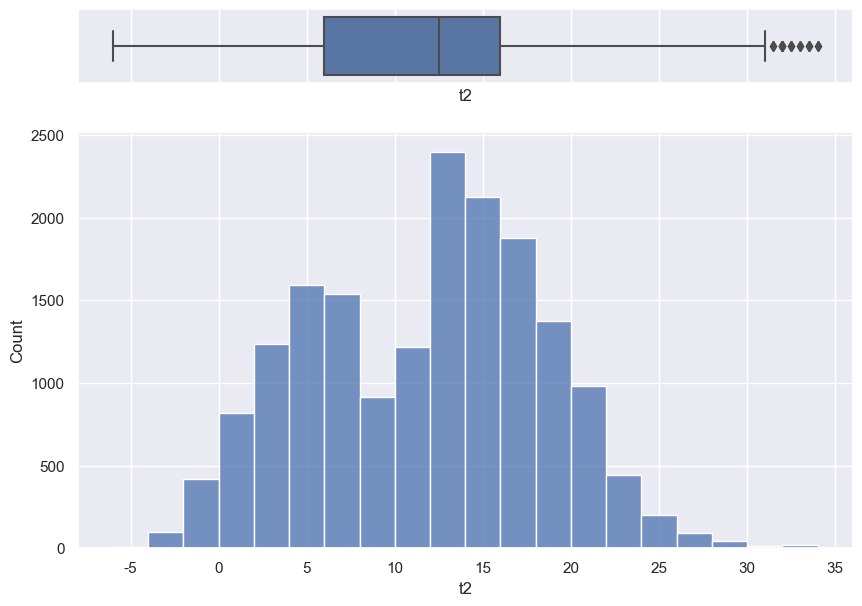

<Figure size 400x400 with 0 Axes>

In [466]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="t2", ax=ax_box)
sns.histplot(data=num_df, x="t2", ax=ax_hist, binwidth=2)

plt.figure(figsize=(4,4))
plt.show()

**t1 has a normal distribution however t2 does not. This will therefore have an impact when attempting the Machine Learning**

In [467]:
print("\033[1;32m Pearson Correlation Matrix to see the pattern between t1 and t2 \n")
df_corr1 = num_df
df_corr1 = df_corr1.corr()
df_corr1

 Pearson Correlation Matrix to see the pattern between t1 and t2 



cnt        t1        t2       hum  wind_speed  weather_code
cnt           1.000000  0.388798  0.369035 -0.462901    0.116295     -0.166633
t1            0.388798  1.000000  0.988344 -0.447782    0.145471     -0.097114
t2            0.369035  0.988344  1.000000 -0.403496    0.088409     -0.098385
hum          -0.462901 -0.447782 -0.403496  1.000000   -0.287788      0.334750
wind_speed    0.116295  0.145471  0.088409 -0.287788    1.000000      0.124803
weather_code -0.166633 -0.097114 -0.098385  0.334750    0.124803      1.000000

<AxesSubplot:>

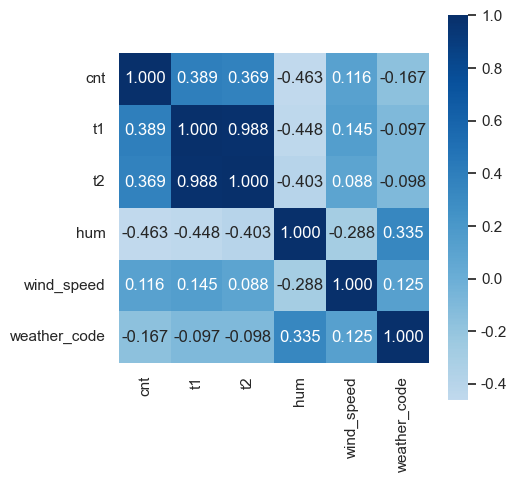

In [468]:
plt.figure(figsize=(5,5))
sns.heatmap(
        df_corr1,
        center=0,
        fmt='.3f',
        cbar=True,
        square=True,
        annot=True,
        cmap=plt.cm.Blues)

**There is a huge correlation between temperature 1 (t1) and temperature 2 (t2) with the same correaltions between the two features and the other features, as such t1  will be kept as there is a higher correlation with the other features and t2 will be removed**

**When the weather code is equal to 1, meaning the weather is Clear there is highest number of bike rentals so this could be another factor that is impacting the number of bike rentals.**

#### Wind speed feature analysis 

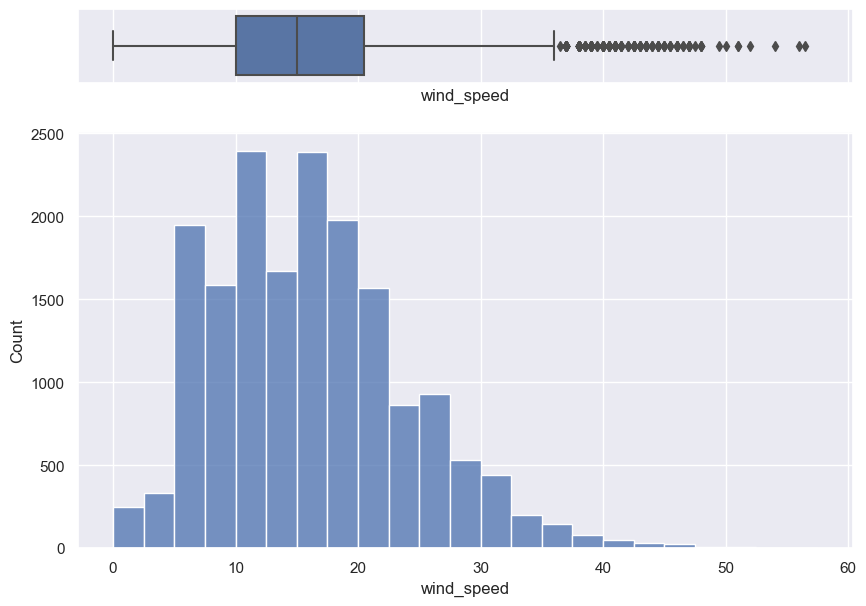

In [469]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="wind_speed", ax=ax_box)
sns.histplot(data=num_df, x="wind_speed", ax=ax_hist, binwidth=2.5)

plt.show()

In [470]:
#compute the IQR to calculate the bounderies
iqr = num_df["t1"].quantile(0.75)-num_df["t1"].quantile(0.25)
print('the IQR is:', iqr)

the IQR is: 8.0


In [471]:
# outliers
lower_bridge = num_df["t1"].quantile(0.25)+(iqr*1.5)
upper_bridge = num_df["t1"].quantile(0.75)+(iqr*1.5)
print('threshold for the outliers, lower bridge', lower_bridge, 'and upper bridge', upper_bridge)

threshold for the outliers, lower bridge 20.0 and upper bridge 28.0


In [472]:
# extrem outliers
ex_lower_bridge = num_df["t1"].quantile(0.25)+(iqr*3)
ex_upper_bridge = num_df["t1"].quantile(0.75)+(iqr*3)
print('threshold for the extreme outliers, lower bridge', ex_lower_bridge, 'and upper bridge', ex_upper_bridge)

threshold for the extrem outliers, lower bridge 32.0 and upper bridge 40.0


In [473]:
print(f'percentage of outliers in wind speed feature:', 
      int((sum(i > 28 for i in num_df['wind_speed'])/num_df['wind_speed'].shape[0])*100),'%')

percentage of outliers in wind speed feature: 7 %


In [474]:
print(f'percentage of extreme outliers in wind speed feature:', 
      int((sum(i > 32 for i in num_df['wind_speed'])/num_df['wind_speed'].shape[0])*100),'%')

percentage of extrem outliers in wind speed feature: 3 %


7% of outliers is too large a portion of data to manipulate therefore only the extreme outliers are to be prepared.
**There are 2 options of adjusting these extreme outliers:**
- 1 keeep the values and cap the outliers as everything above 32km/h is equal to 32 (using the IQR method)
- 2 transform into Beaufort scale with only the first six categories of the Beaufort scale (32 km/h is in the category 5)

<img src="beaufort scale.jpg">

##### Option 1 Beaufort Scale with six categories

In [475]:
num_df["beaufort_sc"] = pd.cut(num_df["wind_speed"],
                bins=[-0.1, 5, 11, 19, 28,38, np.inf],
                labels=["Calm", "Light Air", "Light Breeze", "Gentle Breeze","Moderate Breeze", 
                        "Fresh breeze and above"])

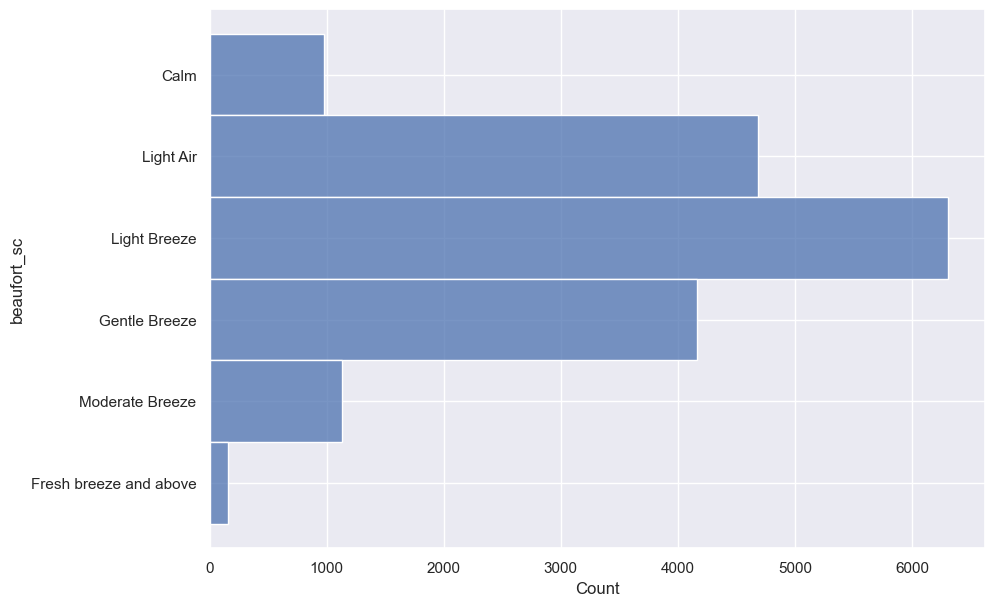

<Figure size 500x400 with 0 Axes>

In [476]:
sns.set_theme(style="darkgrid")
sns.histplot(data=num_df, y="beaufort_sc")

plt.figure(figsize=(5,4))
plt.show()

In [477]:
print("\033[1;32m the first rows of the new subdataframe \n")
num_df.head()

 the first rows of the new subdataframe 



cnt   t1   t2    hum  wind_speed  weather_code beaufort_sc
0  182  3.0  2.0   93.0         6.0             3   Light Air
1  138  3.0  2.5   93.0         5.0             1        Calm
2  134  2.5  2.5   96.5         0.0             1        Calm
3   72  2.0  2.0  100.0         0.0             1        Calm
4   47  2.0  0.0   93.0         6.5             1   Light Air

##### Option 2 

In [478]:
num_df.loc[num_df["wind_speed"]>=32, "wind_speed"]=32

In [479]:
print("\033[1;32m Unique values for the feature wind speed \n")
num_df["wind_speed"].unique()

 Unique values for the feature wind speed 



array([ 6. ,  5. ,  0. ,  6.5,  4. ,  7. ,  8. ,  9. , 12. , 13. , 15. ,
       11. ,  7.5, 10. , 14. , 16. , 19.5, 18. , 19. , 27.5, 26. , 23. ,
       22. , 17.5, 21. , 27. , 28. , 28.5, 25. , 24. , 30. , 30.5, 20.5,
       17. , 22.5, 29.5, 29. , 32. , 31.5, 20. , 31. , 18.5, 24.5, 21.5,
       23.5,  5.5,  3.5,  4.5,  3. ,  2. , 16.5,  8.5, 25.5, 26.5,  9.5,
       30.8, 15.5, 11.5, 12.5, 14.5, 13.5, 11.7, 10.5,  2.7,  1. ])

In [480]:
print("\033[1;32m Distribution of wind speed AFTER flooring \n")

 Distribution of wind speed AFTER flooring 



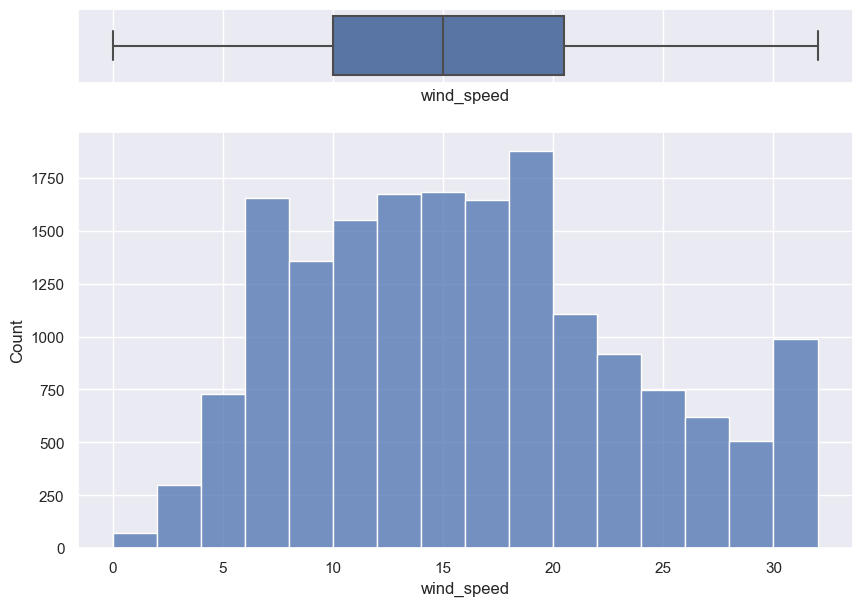

In [481]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="wind_speed", ax=ax_box)
sns.histplot(data=num_df, x="wind_speed", ax=ax_hist, binwidth=2, )

plt.show()

**Statistical analysis after flooring**

**The former mean was:15.91, the former standard deviation was:7.89 and the skewness was:0.67**

In [482]:
print(f'new statistical analysis:\n',
      num_df["wind_speed"].describe())

new statistical analysis:
 count    17414.000000
mean        15.757218
std          7.479692
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         32.000000
Name: wind_speed, dtype: float64


In [483]:
print("skewness of wind speed's distribution:", round(num_df["wind_speed"].skew(), 2))

skewness of wind speed's distribution: 0.37


**The distribution has been slightly altered however only marginally therefore the pattern should not be too impacted**

#### Humidity feature 

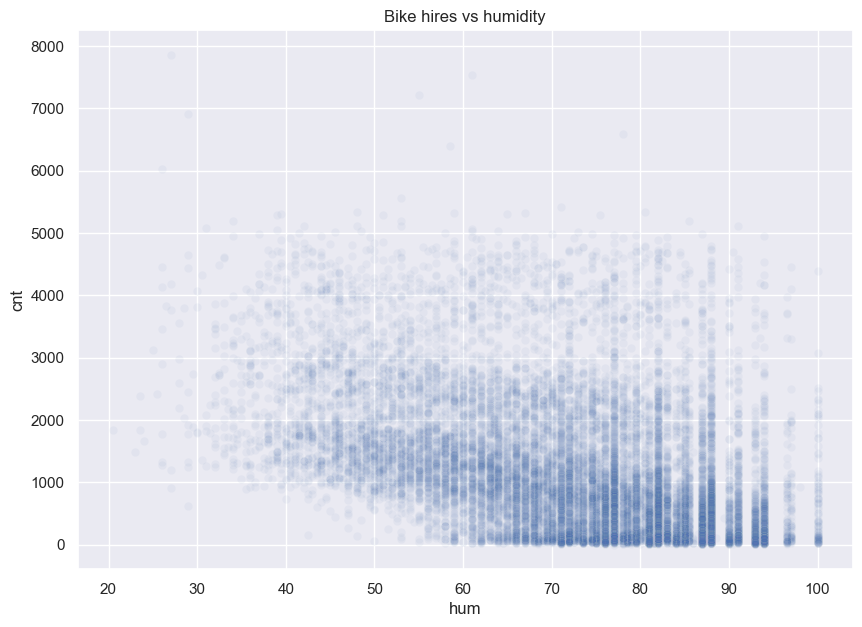

In [484]:
g = sns.scatterplot(data=num_df, x='hum', y='cnt', alpha=0.05, palette=sns.color_palette("hot", as_cmap=True))
plt.title('Bike hires vs humidity')
plt.show()

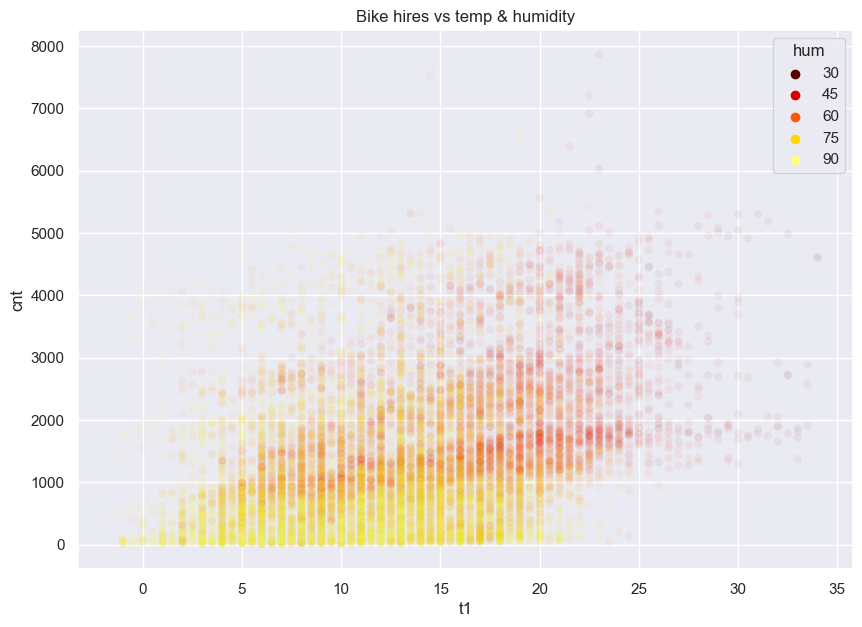

In [485]:
g = sns.scatterplot(data=num_df, x='t1', y='cnt', alpha=0.05, hue='hum', palette=sns.color_palette("hot", as_cmap=True))
plt.title('Bike hires vs temp & humidity')
plt.show()

### Visualisation for categorical variables 

#### Weather code 

Notes: "weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 
- 94 = Freezing Fog

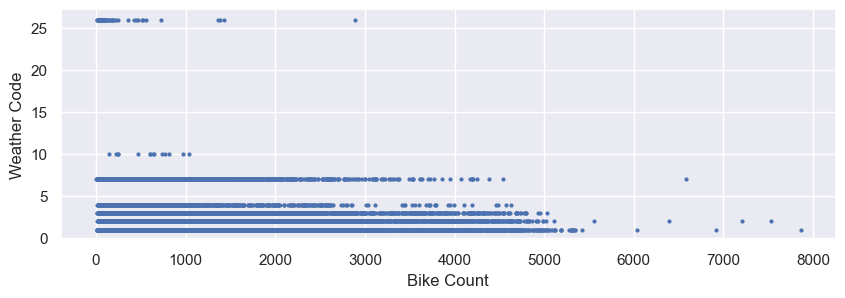

In [486]:
fig, ax = plt.subplots(figsize=(10,3)) 
ax.scatter(bikes_df2['cnt'], num_df['weather_code'], s=2**2) 
ax.set_xlabel('Bike Count') 
ax.set_ylabel('Weather Code') 
plt.show()

In [487]:
num_df.loc[num_df['weather_code'] >=27]

Empty DataFrame
Columns: [cnt, t1, t2, hum, wind_speed, weather_code, beaufort_sc]
Index: []

**There are no bikes rented with the weather code "94", so this category can be ignored**

### Visualisation of categorical features 

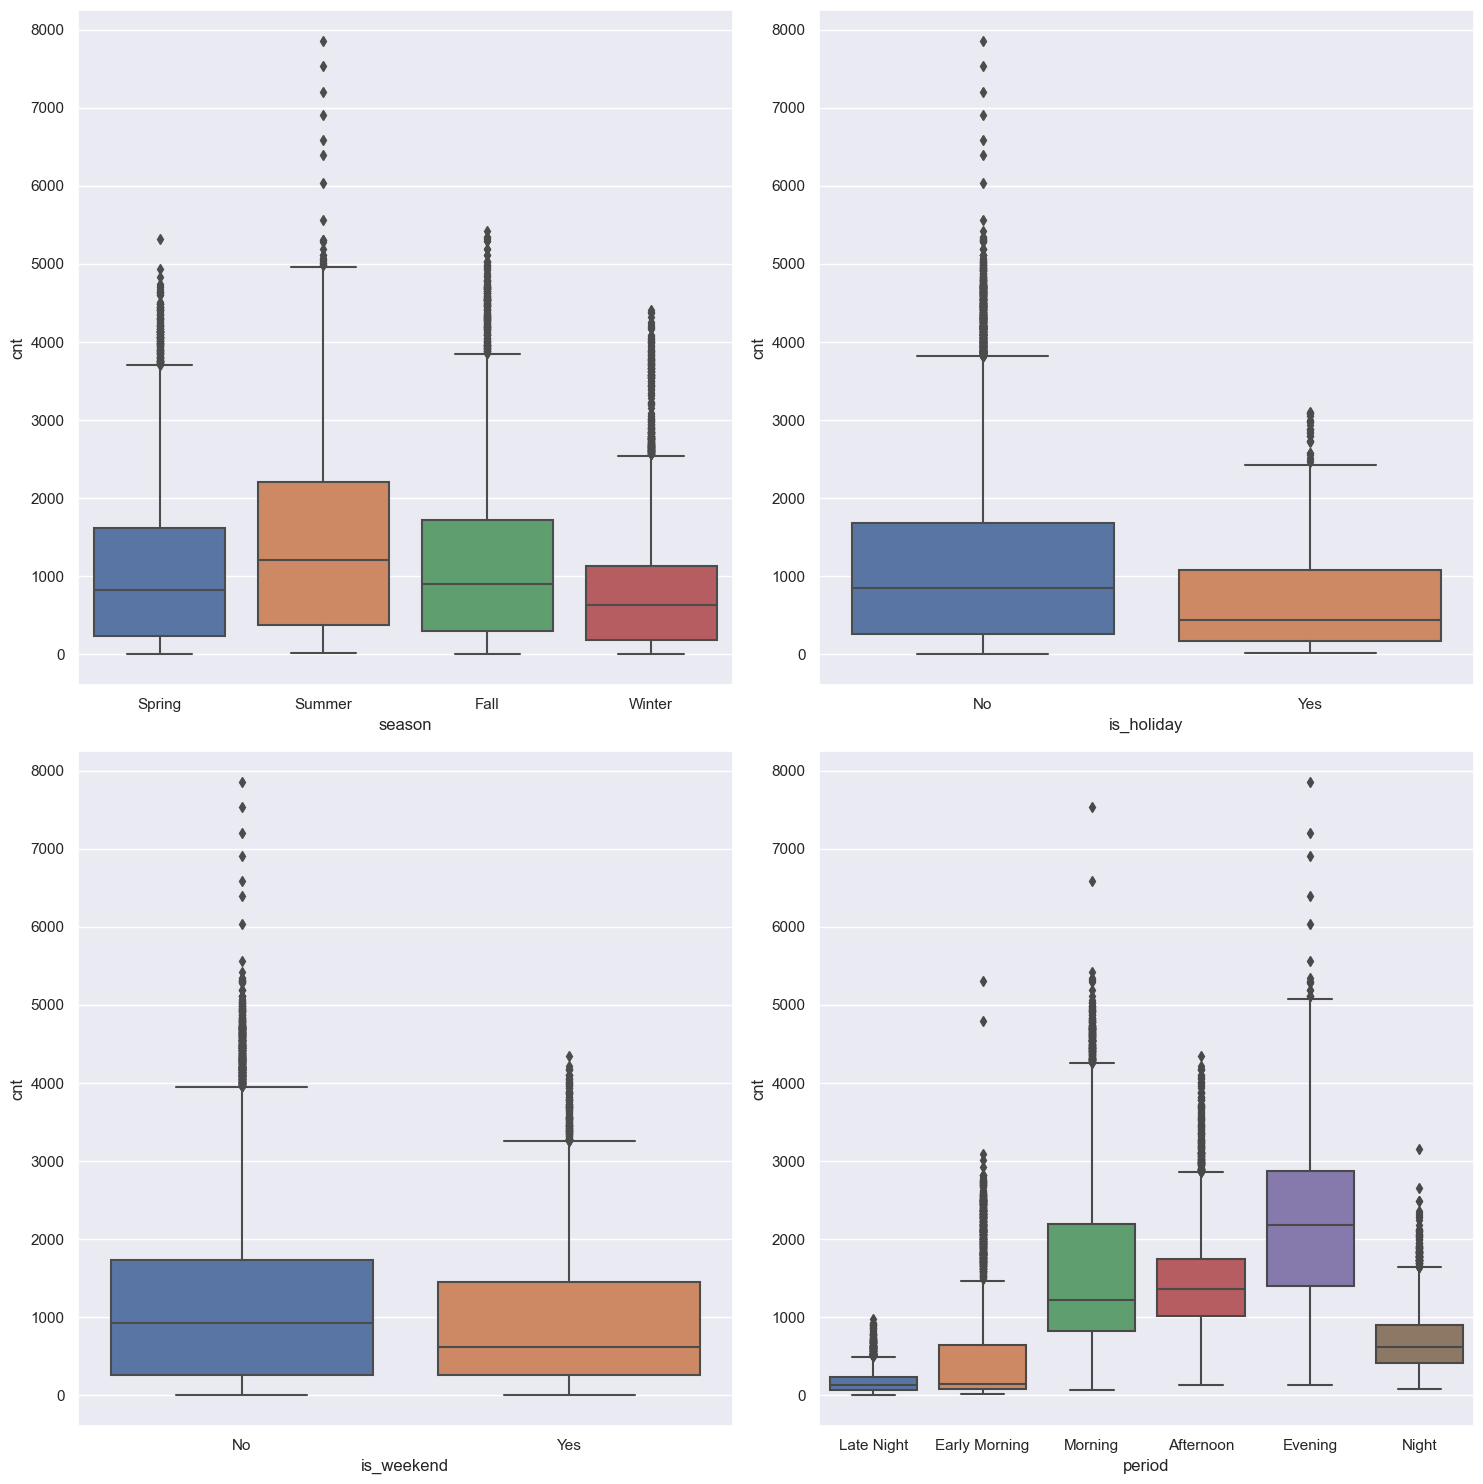

In [488]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15,15)

sns.boxplot(data=bikes_df2, y = 'cnt', x = 'season', ax=axes[0][0])
axes[0][0].set_xticklabels(['Spring','Summer','Fall','Winter'])

sns.boxplot(data=bikes_df2, y='cnt', x='is_holiday', ax=axes[0][1])
axes[0][1].set_xticklabels(['No','Yes'])

sns.boxplot(data=bikes_df2,y='cnt',x='is_weekend',ax=axes[1][0])
axes[1][0].set_xticklabels(['No','Yes'])

sns.boxplot(data=bikes_df2,y='cnt',x='period',ax=axes[1][1])
axes[1][1].set_xticklabels(['Late Night', 'Early Morning', 'Morning', 'Afternoon','Evening','Night'])

plt.tight_layout()

**As seen from the above graph there is a correlation between the number of bikes rented in Season 1 (April, May and June. Note: Season 0 is the first three months of the year) as the bike count nears 8000, these values are scattered after the bike count exceeds 5000 so the bike rental count is not consistent after this value. It is the highest count for bike rentals. This is the peak of the summer season therefore it would be expected to see a peak in bike rentals.**

<AxesSubplot:xlabel='period', ylabel='cnt'>

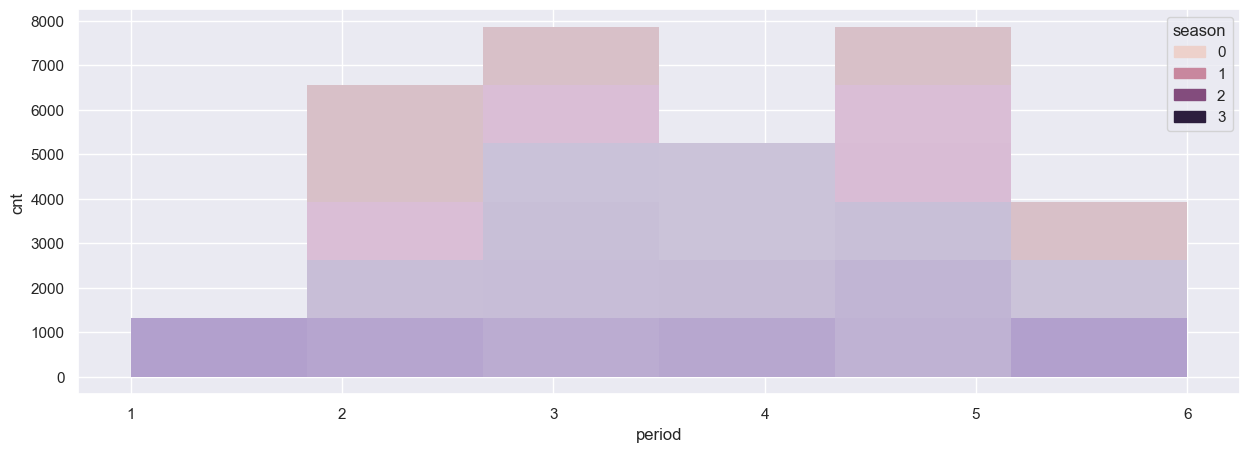

In [489]:
sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(bikes_df2,x='period',y='cnt',hue='season',hue_order=[3,0,2,1],bins=6)

# Preprocessing

## Feature reduction

Notes: 
- Addressing the outliers for t1 and the target and standardisation of numerical values.
- The column year can be removed as the same pattern can be seen for 2016 & 2015.
- The column t2 can also be removed as the information is captured in t1 
- The ratio is to be used instead of % for the humidity feature
- The Beaufort scale is to be used to categorise the wind_speed feature
- The column season can be removed as the information is captured in the month feature. The increase of bikes rented during the summer is captured within the feature month. 
- Label encoding will be carried out for all categorical data 
- PCA will be carried out on the final features

### Outliers

#### Review of outliers in the target variable

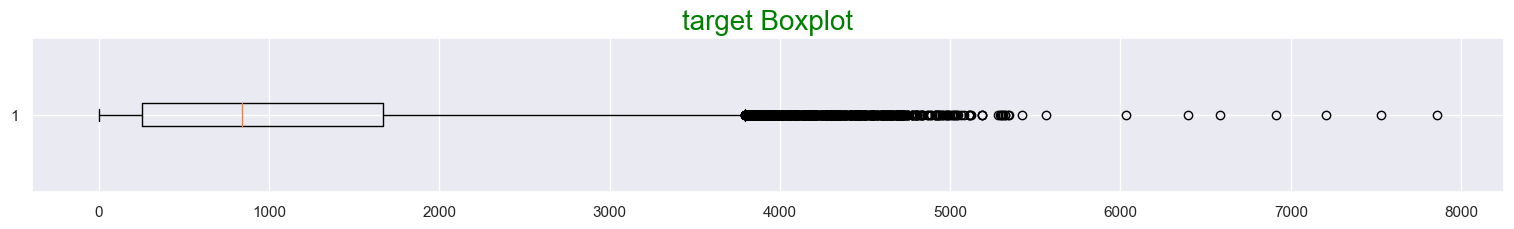

In [490]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(num_df['cnt'], vert=False)
plt.title(label="target Boxplot",fontsize=20,color="green")
plt.show()

In [491]:
print(f'Statistical analysis:\n',
      num_df["cnt"].describe())

Statistical analysis:
 count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64


In [492]:
#compute the IQR to calculate the bounderies
iqr = num_df["cnt"].quantile(0.75)-num_df["cnt"].quantile(0.25)
print('the IQR is:', iqr)

the IQR is: 1414.75


In [493]:
# outliers
lower_bridge = num_df["cnt"].quantile(0.25)+(iqr*1.5)
upper_bridge = num_df["cnt"].quantile(0.75)+(iqr*1.5)
print('threshold for the outliers, lower bridge', lower_bridge, 'and upper bridge', upper_bridge)

threshold for the outliers, lower bridge 2379.125 and upper bridge 3793.875


In [494]:
# extrem outliers
ex_lower_bridge = num_df["cnt"].quantile(0.25)+(iqr*3)
ex_upper_bridge = num_df["cnt"].quantile(0.75)+(iqr*3)
print('threshold for the extreme outliers, lower bridge', ex_lower_bridge, 'and upper bridge', ex_upper_bridge)

threshold for the extrem outliers, lower bridge 4501.25 and upper bridge 5916.0


In [495]:
print(f'percentage of outliers in the target feature:', 
      int((sum(i > 3793.875 for i in num_df['cnt'])/num_df['cnt'].shape[0])*100),'%')

percentage of outliers in the target feature: 3 %


In [496]:
print(f'percentage of extreme outliers in the target feature:', 
      int((sum(i > 4501 for i in num_df['cnt'])/num_df['cnt'].shape[0])*100),'%')

percentage of extrem outliers in the target feature: 1 %


1% of the target variables are outliers as this value is low these are to be removed.
This will be carried out after concatenation of the two dataframes to have the same length.

In [497]:
num_df.head()

cnt   t1   t2    hum  wind_speed  weather_code beaufort_sc
0  182  3.0  2.0   93.0         6.0             3   Light Air
1  138  3.0  2.5   93.0         5.0             1        Calm
2  134  2.5  2.5   96.5         0.0             1        Calm
3   72  2.0  2.0  100.0         0.0             1        Calm
4   47  2.0  0.0   93.0         6.5             1   Light Air

#### Outliers in feature : temperature (t1)

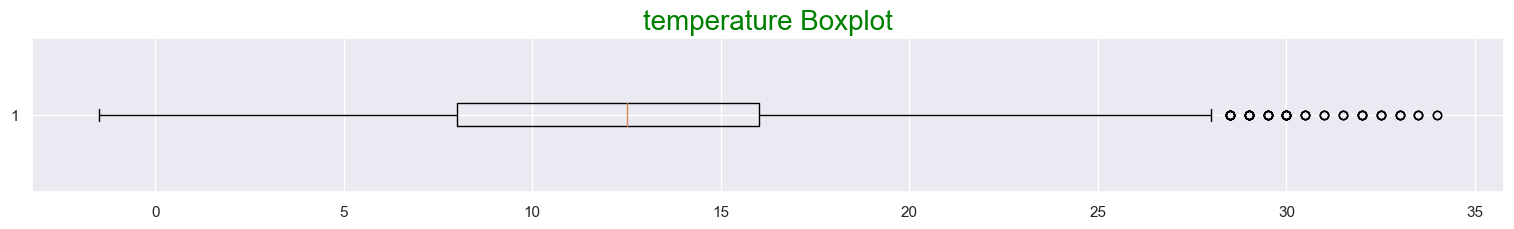

In [498]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(num_df['t1'], vert=False)
plt.title(label="temperature Boxplot",fontsize=20, color="green")
plt.show()

In [499]:
print(f'Statistical analysis:\n',
      num_df["t1"].describe())

Statistical analysis:
 count    17414.000000
mean        12.468089
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64


In [500]:
#compute the IQR to calculate the bounderies
iqr = num_df["t1"].quantile(0.75)-num_df["t1"].quantile(0.25)
print('the IQR is:', iqr)

the IQR is: 8.0


In [501]:
# outliers
lower_bridge = num_df["t1"].quantile(0.25)+(iqr*1.5)
upper_bridge = num_df["t1"].quantile(0.75)+(iqr*1.5)
print('threshold for the outliers, lower bridge', lower_bridge, 'and upper bridge', upper_bridge)

threshold for the outliers, lower bridge 20.0 and upper bridge 28.0


In [502]:
print(f'percentage of outliers (lower bridge) in the temperature feature:',
      round(sum(i > 20 for i in num_df['t1'])/num_df['t1'].shape[0]*100, 2),'%')

percentage of outliers (lower bridge) in the temperature feature: 8.3 %


In [503]:
print(f'percentage of outliers (uper bridge) in the temperature feature:',
      round(sum(i > 28 for i in num_df['t1'])/num_df['t1'].shape[0]*100, 2),'%')

percentage of outliers (uper bridge) in the temperature feature: 0.37 %


There are very few extreme outliers in the temperature feature (above 28: less than 0.3%). The temperature feature will be floored as the impact on the distribution will be low. Then, the feature can then be normalised to ensure it is in the same scale as the other categorical features.
Note :Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [504]:
print(num_df["t1"].unique())

[ 3.   2.5  2.   1.   1.5  4.   5.   6.   6.5  7.   8.   9.  10.   9.5
  8.5 11.   7.5  5.5  4.5  3.5 11.5 12.  10.5 12.5 13.  13.5 15.  15.5
 14.   0.5  0.  -0.5 -1.  -1.5 16.  14.5 16.5 17.5 17.  18.  19.5 20.5
 20.  18.5 21.5 22.5 22.  23.5 23.  24.  25.  19.  21.  24.5 25.5 26.
 27.  28.5 29.  30.  33.  32.  31.5 33.5 34.  29.5 27.5 26.5 28.  30.5
 31.  32.5 10.3]


In [505]:
num_df.loc[num_df["t1"]>=28, "t1"]=28

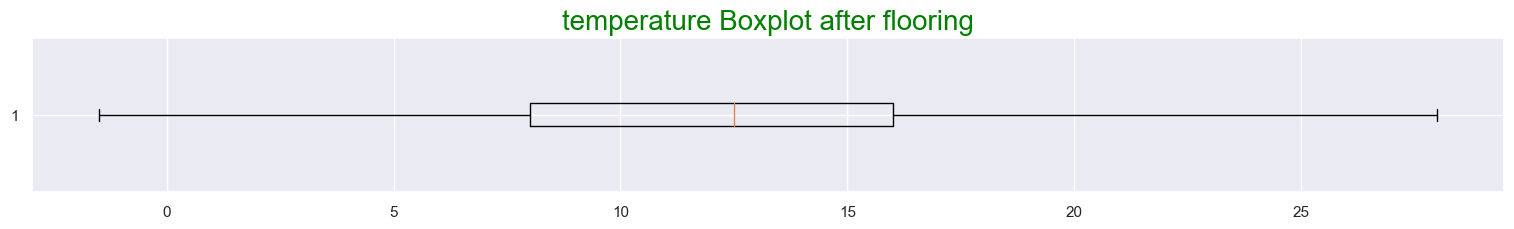

In [506]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(num_df['t1'], vert=False)
plt.title(label="temperature Boxplot after flooring",fontsize=20, color="green")
plt.show()

### rescaling humidity  and Temperature features

Min-max feature scaling is often simply referred to as normalization, which rescales the dataset feature to a range of 0-1.
Below the formula:

<img src="normalisation.png">

**Creation of a new column containing the scaled data**

In [507]:
num_df['t1_scaled'] = num_df['t1']
num_df.head()

cnt   t1   t2    hum  wind_speed  weather_code beaufort_sc  t1_scaled
0  182  3.0  2.0   93.0         6.0             3   Light Air        3.0
1  138  3.0  2.5   93.0         5.0             1        Calm        3.0
2  134  2.5  2.5   96.5         0.0             1        Calm        2.5
3   72  2.0  2.0  100.0         0.0             1        Calm        2.0
4   47  2.0  0.0   93.0         6.5             1   Light Air        2.0

In [508]:
num_df['t1_scaled'] = (num_df['t1_scaled'] - num_df['t1_scaled'].min())/(num_df['t1_scaled'].max() - num_df['t1_scaled'].min()) 

In [509]:
num_df["ratio_hum"] = round(num_df["hum"]/100, 2)

**visualisation of the rescaled features (t1 and humidity)**

In [510]:
num_df.head()

cnt   t1   t2    hum  wind_speed  weather_code beaufort_sc  t1_scaled  \
0  182  3.0  2.0   93.0         6.0             3   Light Air   0.152542   
1  138  3.0  2.5   93.0         5.0             1        Calm   0.152542   
2  134  2.5  2.5   96.5         0.0             1        Calm   0.135593   
3   72  2.0  2.0  100.0         0.0             1        Calm   0.118644   
4   47  2.0  0.0   93.0         6.5             1   Light Air   0.118644   

   ratio_hum  
0       0.93  
1       0.93  
2       0.96  
3       1.00  
4       0.93

**Review of the correlation matrix one last time to confirm there is no loss of information**

In [511]:
df_corr2 = num_df
df_corr2 = df_corr2.corr()
df_corr2

cnt        t1        t2       hum  wind_speed  \
cnt           1.000000  0.388350  0.369035 -0.462901    0.126623   
t1            0.388350  1.000000  0.988477 -0.446027    0.154989   
t2            0.369035  0.988477  1.000000 -0.403496    0.095390   
hum          -0.462901 -0.446027 -0.403496  1.000000   -0.294163   
wind_speed    0.126623  0.154989  0.095390 -0.294163    1.000000   
weather_code -0.166633 -0.096401 -0.098385  0.334750    0.120457   
t1_scaled     0.388350  1.000000  0.988477 -0.446027    0.154989   
ratio_hum    -0.462858 -0.445602 -0.403028  0.999861   -0.293730   

              weather_code  t1_scaled  ratio_hum  
cnt              -0.166633   0.388350  -0.462858  
t1               -0.096401   1.000000  -0.445602  
t2               -0.098385   0.988477  -0.403028  
hum               0.334750  -0.446027   0.999861  
wind_speed        0.120457   0.154989  -0.293730  
weather_code      1.000000  -0.096401   0.334794  
t1_scaled        -0.096401   1.000000  -0.445602  
ratio_hum         0.334794  -0.445602   1.000000

<AxesSubplot:title={'center':'Correlation matrix with scaled features'}>

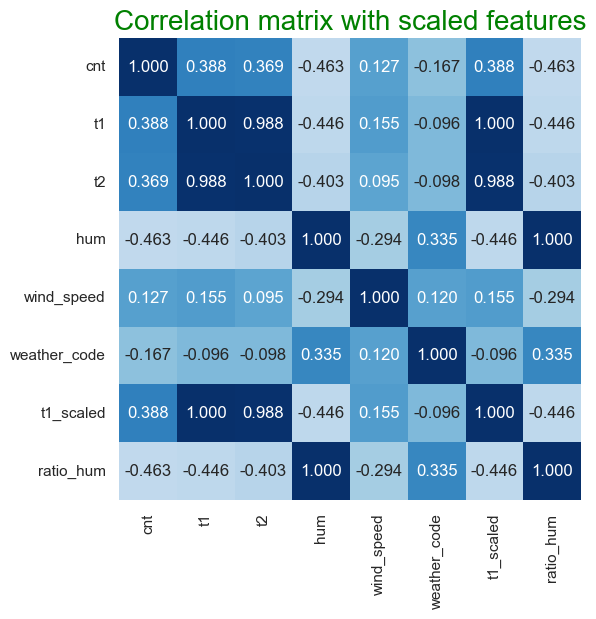

In [512]:
plt.figure(figsize=(6,6))
plt.title(label="Correlation matrix with scaled features",fontsize=20, color="green")
sns.heatmap(
        df_corr2,
        center=0,
        fmt='.3f',
        cbar=False,
        square=True,
        annot=True,
        cmap=plt.cm.Blues,
    )

**Notes:**<br> Correlation t1_hum old = -0.448 vs new=-0.435
correlation t1_weather code old = -0.097 vs new=-0.092. <br>There is no difference between the rescaled features and the original version.

### Drop unnecessary columns and concatenate the differents dataframes

**Number of Bikes used from 2015 until January 2017**

In [513]:
#check for year-wise 
df_temp=bikes_df2.groupby('year').sum()
df_temp

month  period       cnt        t1        t2  ...  wind_speed  \
year                                               ...               
2015  56720   30272   9738746  109074.5  101491.5  ...    144070.5   
2016  56654   30484  10129546  107705.8   99018.3  ...    131978.2   
2017     72     252     37680     339.0     114.0  ...      1061.5   

      weather_code  is_holiday  is_weekend  season  
year                                                
2015         23763         168        2458   12763  
2016         23416         192        2488   13004  
2017           235          24          24     216  

[3 rows x 11 columns]

**From those graphs plots, the year is not adding any value as the pattern for 2015 and 2016 are similar, with only minor variations, therefore the feature "year" was removed. 

**Review of first 5 rows of the current version of the dataframe**

In [514]:
num_df.head()

cnt   t1   t2    hum  wind_speed  weather_code beaufort_sc  t1_scaled  \
0  182  3.0  2.0   93.0         6.0             3   Light Air   0.152542   
1  138  3.0  2.5   93.0         5.0             1        Calm   0.152542   
2  134  2.5  2.5   96.5         0.0             1        Calm   0.135593   
3   72  2.0  2.0  100.0         0.0             1        Calm   0.118644   
4   47  2.0  0.0   93.0         6.5             1   Light Air   0.118644   

   ratio_hum  
0       0.93  
1       0.93  
2       0.96  
3       1.00  
4       0.93

In [515]:
print("\033[1;32m Columns names in bikes_df \n")
bikes_df2.columns

 Columns names in bikes_df 



Index(['year', 'month', 'period', 'cnt', 't1', 't2', 'hum', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [516]:
print("\033[1;32m Columns names in num_df\n")
num_df.columns

 Columns names in num_df



Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'beaufort_sc',
       't1_scaled', 'ratio_hum'],
      dtype='object')

**Removal of the chosen columns and merging of the datasets.**

In [517]:
df2 = bikes_df2[['month', 'period','is_holiday', 'is_weekend']]
df1 = num_df[['cnt','ratio_hum', 't1_scaled','weather_code', 'beaufort_sc']]

frames = [df1, df2]

In [518]:
bikes_df3 = pd.concat(frames, axis=1)

In [519]:
print("\033[1;32m First row of the new dataset \n")
bikes_df3.head()

 First row of the new dataset 



cnt  ratio_hum  t1_scaled  weather_code beaufort_sc  month  period  \
0  182       0.93   0.152542             3   Light Air      1       1   
1  138       0.93   0.152542             1        Calm      1       1   
2  134       0.96   0.135593             1        Calm      1       1   
3   72       1.00   0.118644             1        Calm      1       1   
4   47       0.93   0.118644             1   Light Air      1       2   

   is_holiday  is_weekend  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1

In [520]:
print(f'New shape of the dataframe:\n''Number of rows:',bikes_df3.shape[0], 
    '\n Number of features:', bikes_df3.shape[1])

New shape of the dataframe so far:
Number of rows: 17414 
 Number of features: 9


Removal of outliers from the target feature (see section 4.1.1.1)

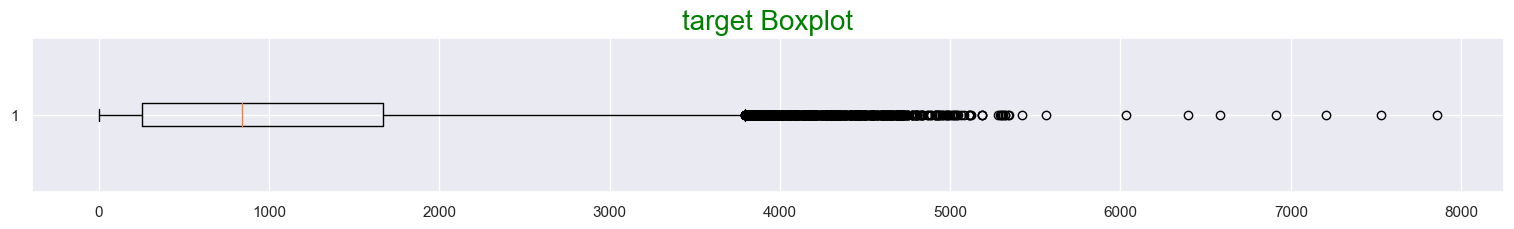

In [521]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(bikes_df3['cnt'], vert=False)
plt.title(label="target Boxplot",fontsize=20,color="green")
plt.show()

In [522]:
bikes_NO = bikes_df3[np.abs(bikes_df3["cnt"] - bikes_df3["cnt"].mean()) <= (3*bikes_df3["cnt"].std())]

print('shape of the two datasets, number of rows for dataset WITHOUT outliers:',bikes_NO.shape[0], 
      '\n and number of rows for dataset WITH outliers:', bikes_df3.shape[0])

shape of the two dataset, number of rows for dataset WITHOUT outliers: 17155 
 and number of rows for dataset WITH outliers: 17414


**visualisation of the data with and without the outliers**

((array([-3.94199014, -3.72392586, -3.60452017, ...,  3.60452017,
          3.72392586,  3.94199014]),
  array([   0,    9,   10, ..., 4391, 4393, 4395], dtype=int64)),
 (935.4537053816817, 1088.575109297581, 0.9388487540385667))

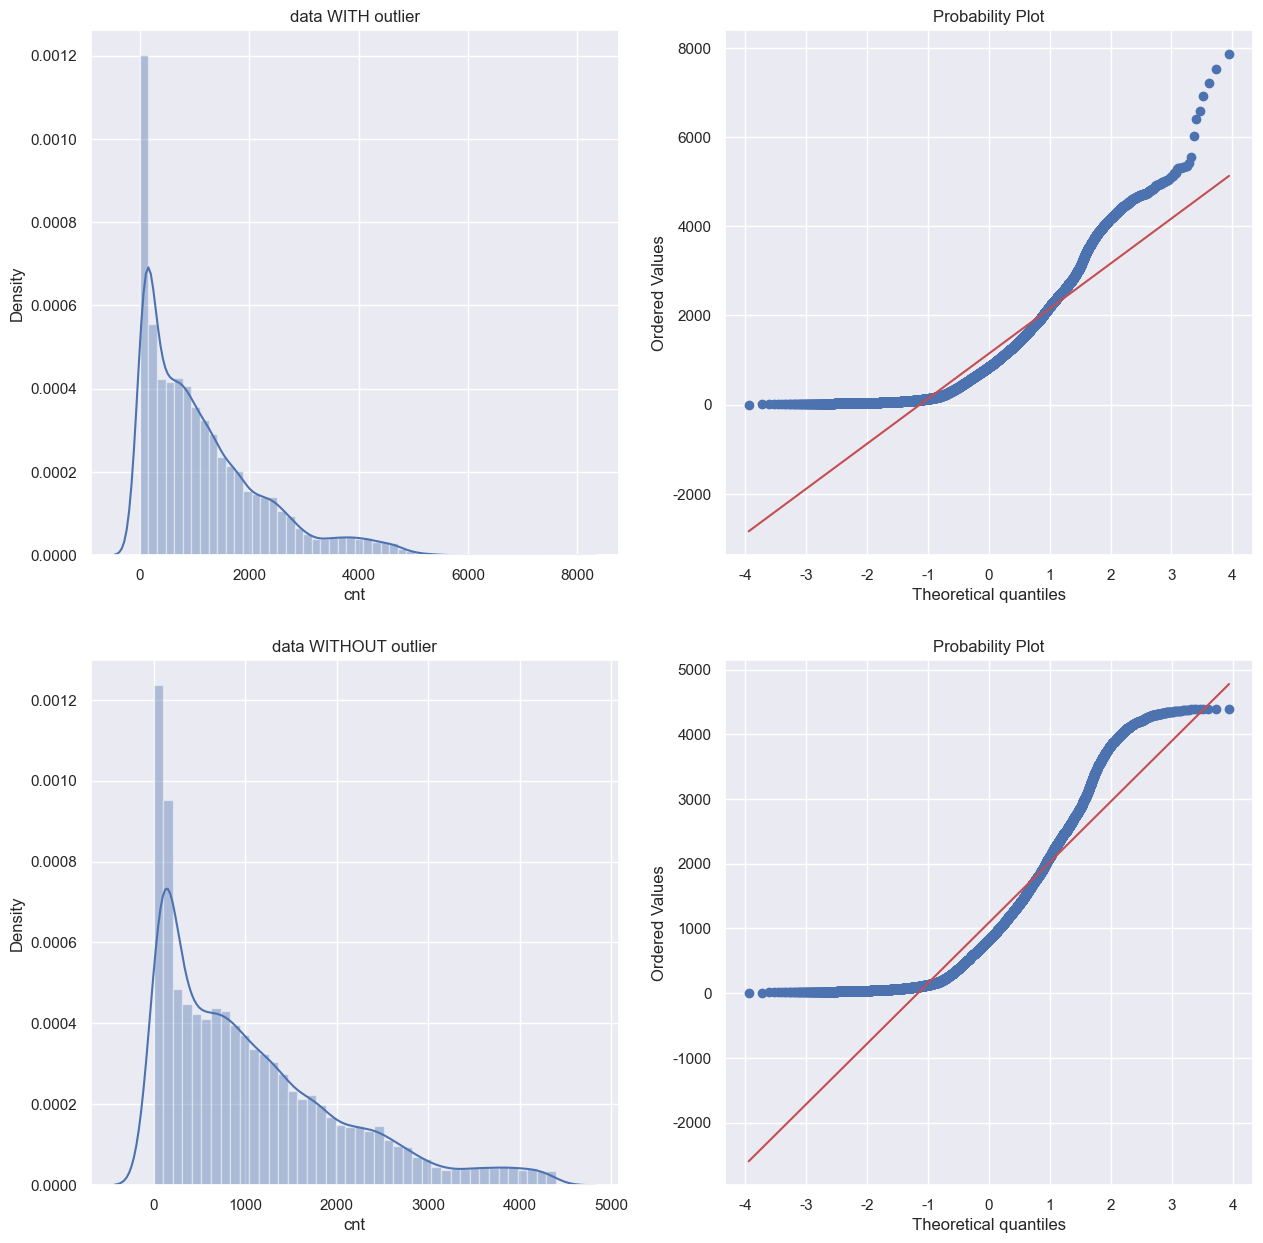

In [523]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(15, 15)

axes[0,0].set_title('data WITH outlier')
axes[1,0].set_title('data WITHOUT outlier')

sns.distplot(bikes_df3["cnt"], ax=axes[0][0])
stats.probplot(bikes_df3["cnt"], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(bikes_NO["cnt"], ax=axes[1][0])
stats.probplot(bikes_NO["cnt"], dist='norm', fit=True, plot=axes[1][1])

## Hot encoding 

**Hot encoding:**
- 1. turning the "beaufort scale feature into label (0 to 5)
- 2. use "get dummies" function for hot encoding
- 3. Apply  PCA reduction

In [524]:
le = preprocessing.LabelEncoder()
le.fit(bikes_NO["beaufort_sc"])

LabelEncoder()

**first row of the dataframe BEFORE and AFTER hot encoding**

In [525]:
bikes_NO['beaufort_sc_en'] = le.transform(bikes_NO["beaufort_sc"])

In [526]:
bikes_NO["beaufort_sc"] = bikes_NO["beaufort_sc_en"]
bikes_NO.drop("beaufort_sc_en", axis=1, inplace=True)

In [527]:
bikes_NO.head()

cnt  ratio_hum  t1_scaled  weather_code  beaufort_sc  month  period  \
0  182       0.93   0.152542             3            3      1       1   
1  138       0.93   0.152542             1            0      1       1   
2  134       0.96   0.135593             1            0      1       1   
3   72       1.00   0.118644             1            0      1       1   
4   47       0.93   0.118644             1            3      1       2   

   is_holiday  is_weekend  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1

**taking only categorical features for hot encoding**

In [528]:
bikes_NO.columns

Index(['cnt', 'ratio_hum', 't1_scaled', 'weather_code', 'beaufort_sc', 'month',
       'period', 'is_holiday', 'is_weekend'],
      dtype='object')

In [529]:
bikes_prepro = pd.get_dummies(bikes_NO,prefix=['weather', 'beaufort', 'month', 'period',
                                                'holiday', 'wk'],
               columns=['weather_code', 'beaufort_sc', 'month', 'period',
                        'is_holiday', 'is_weekend'])

In [530]:
bikes_prepro.columns

Index(['cnt', 'ratio_hum', 't1_scaled', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'weather_7', 'weather_10', 'weather_26', 'beaufort_0',
       'beaufort_1', 'beaufort_2', 'beaufort_3', 'beaufort_4', 'beaufort_5',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'period_1', 'period_2', 'period_3', 'period_4', 'period_5', 'period_6',
       'holiday_0', 'holiday_1', 'wk_0', 'wk_1'],
      dtype='object')

In [531]:
bikes_prepro.head()

cnt  ratio_hum  t1_scaled  weather_1  weather_2  ...  period_6  holiday_0  \
0  182       0.93   0.152542          0          0  ...         0          1   
1  138       0.93   0.152542          1          0  ...         0          1   
2  134       0.96   0.135593          1          0  ...         0          1   
3   72       1.00   0.118644          1          0  ...         0          1   
4   47       0.93   0.118644          1          0  ...         0          1   

   holiday_1  wk_0  wk_1  
0          0     0     1  
1          0     0     1  
2          0     0     1  
3          0     0     1  
4          0     0     1  

[5 rows x 38 columns]

Review of the dataset prior to PCA

In [532]:
for col in bikes_prepro:
    print(f'{col:-<25} {bikes_prepro[col].unique()}')

cnt---------------------- [ 182  138  134 ... 2842   10 2220]
ratio_hum---------------- [0.93 0.96 1.   0.87 0.9  0.84 0.81 0.79 0.82 0.85 0.74 0.69 0.71 0.76
 0.88 0.68 0.78 0.72 0.62 0.8  0.7  0.67 0.63 0.77 0.58 0.54 0.48 0.52
 0.55 0.57 0.66 0.75 0.64 0.61 0.59 0.56 0.6  0.94 0.53 0.51 0.73 0.65
 0.86 0.83 0.91 0.5  0.46 0.44 0.43 0.4  0.36 0.49 0.47 0.45 0.41 0.26
 0.27 0.31 0.42 0.35 0.97 0.33 0.39 0.37 0.32 0.38 0.34 0.3  0.29 0.28
 0.24 0.2  0.25 0.23 0.98]
t1_scaled---------------- [0.15254237 0.13559322 0.11864407 0.08474576 0.10169492 0.18644068
 0.22033898 0.25423729 0.27118644 0.28813559 0.3220339  0.3559322
 0.38983051 0.37288136 0.33898305 0.42372881 0.30508475 0.23728814
 0.20338983 0.16949153 0.44067797 0.45762712 0.40677966 0.47457627
 0.49152542 0.50847458 0.55932203 0.57627119 0.52542373 0.06779661
 0.05084746 0.03389831 0.01694915 0.         0.59322034 0.54237288
 0.61016949 0.6440678  0.62711864 0.66101695 0.71186441 0.74576271
 0.72881356 0.6779661  0.77966102 0.

In [533]:
print('Number of rows for the dataset:bikes_prepro:',bikes_prepro.shape[0])

Number of rows for the dataset:bikes_prepro: 17155


## PCA

Notes: Sparse the dataset 

In [534]:
target = bikes_prepro['cnt']
bikes_prepro.drop(columns='cnt', axis=1, inplace=True)

In [535]:
print('shape of the new dataframe, number of rows for target:',target.shape[0], 
      '\n and number of rows for the dependant variable:', bikes_prepro.shape[0])

shape of the new dataframe, number of rows for target: 17155 
 and number of rows for the dependant variable: 17155


In [536]:
#95% of variance
pca = PCA(n_components =0.995, random_state=42)
pca_df = pca.fit_transform(bikes_prepro)

v_exp = pca.explained_variance_ratio_.cumsum()
v_ratio = pca.explained_variance_ratio_.sum()
print(v_exp, v_ratio, v_exp.shape)

[0.11046642 0.2046531  0.29023026 0.35548224 0.41324348 0.45882085
 0.50361275 0.54796022 0.59140405 0.63401765 0.66937036 0.69882712
 0.72544271 0.74919277 0.77218284 0.79487919 0.81737934 0.83974006
 0.86186696 0.88365203 0.9050854  0.92613254 0.94693873 0.96680551
 0.98102053 0.99186505 0.99488171 0.99716879] 0.9971687893459296 (28,)


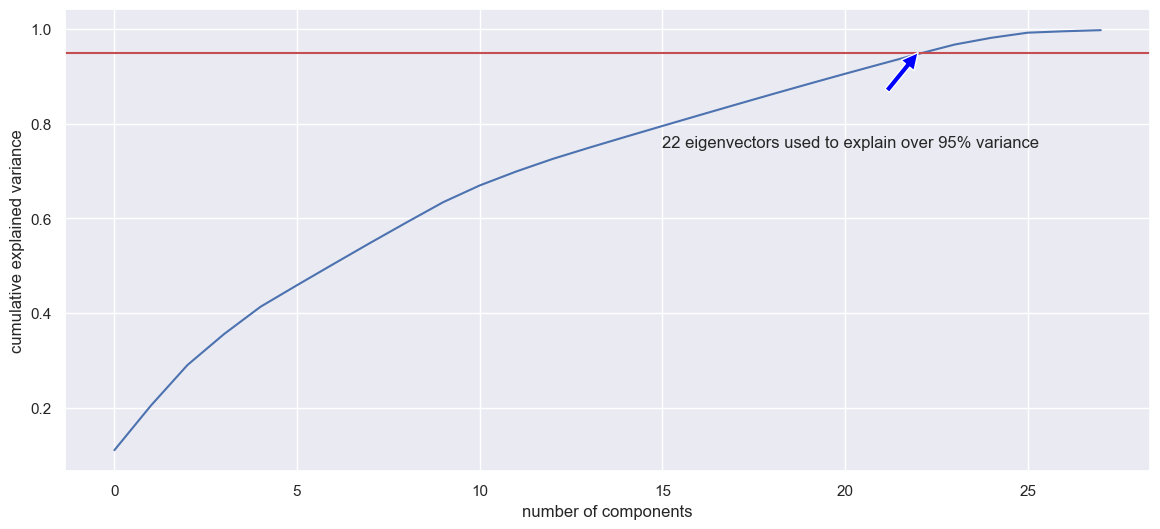

In [537]:
# Plotting the Data
plt.figure(1, figsize=(14, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

#Plotting line with 95% e.v.
plt.axhline(y=0.95, color='r', linestyle='-')

#adding an arrow and annotations
arrowprops=dict(facecolor='blue', shrink=0.5)
an = plt.annotate("22 eigenvectors used to explain over 95% variance", 
                  xy=(22, 0.95), xytext=(15, 0.75), arrowprops=arrowprops)
plt.show()

In [538]:
# Running PCA again
pca = PCA(n_components=22, random_state = 42)
variables_pca = pca.fit(bikes_prepro).transform(bikes_prepro)

In [539]:
print("\033[1;32m creating new dataframe for machine learning \n")
variables_pca_df = pd.DataFrame(variables_pca)
bikes_ml = variables_pca_df.copy()
bikes_ml= bikes_ml.add_prefix('PC_')
bikes_ml.head()

 creating new dataframe for machine learning 



PC_0      PC_1      PC_2      PC_3      PC_4  ...     PC_17     PC_18  \
0  1.096966  0.220729 -0.610586 -0.934354 -0.353061  ... -0.625901 -0.056426   
1  1.025198  0.729659 -0.023649  0.337412 -0.108066  ... -0.445915  0.038140   
2  1.025596  0.731464 -0.024596  0.331410 -0.109907  ... -0.447334  0.036594   
3  1.026113  0.733600 -0.025749  0.323942 -0.112237  ... -0.449034  0.034808   
4  1.040612  1.019126 -0.494151 -0.130721  0.127451  ... -0.611727  0.013569   

      PC_19     PC_20     PC_21  
0  0.118342 -0.297642 -0.031127  
1  0.142573 -0.040598 -0.040700  
2  0.144076 -0.042572 -0.038937  
3  0.145969 -0.045020 -0.036866  
4  0.225167 -0.247028  0.014962  

[5 rows x 22 columns]

<AxesSubplot:title={'center':'PCA componants distribution'}>

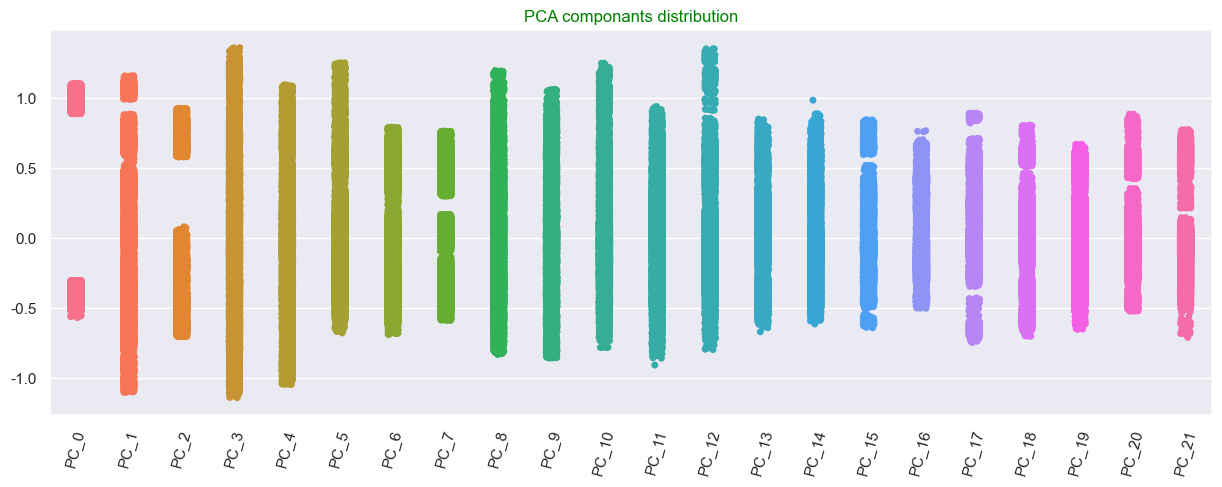

In [540]:
plt.xticks(rotation=75)
plt.title('PCA componants distribution', color='green')
sns.set(rc={'figure.figsize':(10,7)})
sns.stripplot(data=bikes_ml)

**We are going to run the machine learning algorythm with 2 datasets:**
-  Baseline = dataset before PCA
-  ML_PCA = dataset after PCA 

## Backup point before ML

#df PCA
bikes_ml.to_csv('dataset/bikes_ml.csv')

#df target
target.to_csv('dataset/target.csv')

#df baseline (before PCA)
bikes_prepro.to_csv('dataset/bikes_prepro.csv')

In [541]:
ml_pca = pd.read_csv("dataset/bikes_ml.csv")
target = pd.read_csv("dataset/target.csv")
bikes_baseline = pd.read_csv("dataset/bikes_prepro.csv")

In [542]:
bikes_baseline.head()

Unnamed: 0  ratio_hum  t1_scaled  weather_1  weather_2  ...  period_6  \
0           0       0.93   0.152542          0          0  ...         0   
1           1       0.93   0.152542          1          0  ...         0   
2           2       0.96   0.135593          1          0  ...         0   
3           3       1.00   0.118644          1          0  ...         0   
4           4       0.93   0.118644          1          0  ...         0   

   holiday_0  holiday_1  wk_0  wk_1  
0          1          0     0     1  
1          1          0     0     1  
2          1          0     0     1  
3          1          0     0     1  
4          1          0     0     1  

[5 rows x 38 columns]

In [543]:
target.head()

Unnamed: 0  cnt
0           0  182
1           1  138
2           2  134
3           3   72
4           4   47

In [544]:
ml_pca.head()

Unnamed: 0      PC_0      PC_1      PC_2      PC_3  ...     PC_17  \
0           0  1.096966  0.220729 -0.610586 -0.934354  ... -0.625901   
1           1  1.025198  0.729659 -0.023649  0.337412  ... -0.445915   
2           2  1.025596  0.731464 -0.024596  0.331410  ... -0.447334   
3           3  1.026113  0.733600 -0.025749  0.323942  ... -0.449034   
4           4  1.040612  1.019126 -0.494151 -0.130721  ... -0.611727   

      PC_18     PC_19     PC_20     PC_21  
0 -0.056426  0.118342 -0.297642 -0.031127  
1  0.038140  0.142573 -0.040598 -0.040700  
2  0.036594  0.144076 -0.042572 -0.038937  
3  0.034808  0.145969 -0.045020 -0.036866  
4  0.013569  0.225167 -0.247028  0.014962  

[5 rows x 23 columns]

In [545]:
ml_pca.drop("Unnamed: 0", axis=1, inplace=True)
target.drop("Unnamed: 0", axis=1, inplace=True)
bikes_baseline.drop("Unnamed: 0", axis=1, inplace=True)

In [546]:
target.head()

cnt
0  182
1  138
2  134
3   72
4   47

# Machine learning

**There is continuity between possible outcomes, therefore it is a regression problem.
The main evaluation metrics for regression are: 
Mean absolute error (MAE)
Mean squared error (MSE)
R squared (R^2)
Adjusted R squared (Adj-R^2)**

##  Choice of the model and dataset

### Before features engineering

**A dataframe compiling all the outcome form differents model of machine learning will be created**<br> **Note:** where parametres is "None", we choose the default parametres of the choosen model.

In [547]:
score_df = pd.DataFrame(columns= ['df', 'ML','Parametres','train_score','R^2','mse', 'RMSE'], data=None)
score_df.head()

Empty DataFrame
Columns: [df, ML, Parametres, train_score, R^2, mse, RMSE]
Index: []

In [548]:
def ml_model (model, X):
    X_train, X_test, y_train, y_test = train_test_split(X,target, random_state = 42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = round(mean_squared_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred),4)
    train_score = round(model.score(X_train, y_train), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)
    
    global score_df
    score_df =score_df.append({'df':X.name,
                               'Parametres': parametres,
                               'ML':type(model).__name__,
                               'train_score':train_score,
                               'R^2':R2,
                               'mse':mse,
                               'RMSE':RMSE},
                              ignore_index=True)
    return (score_df)

In [549]:
X = bikes_baseline
y= target

In [550]:
model = SGDRegressor(random_state=42 )
X=X
X.name = "bikes_baseline"
parametres = ("None")

ml_model(model, X)

df            ML Parametres  train_score     R^2          mse  \
0  bikes_baseline  SGDRegressor       None       0.5603  0.5676  416574.9269   

       RMSE  
0  645.4262

In [551]:
model = LinearRegression()
X=X
X.name = "bikes_baseline"
parametres = ("None")

ml_model(model, X)

df                ML Parametres  train_score     R^2  \
0  bikes_baseline      SGDRegressor       None       0.5603  0.5676   
1  bikes_baseline  LinearRegression       None       0.5611  0.5694   

           mse      RMSE  
0  416574.9269  645.4262  
1  414778.2973  644.0328

In [552]:
model = KNeighborsRegressor(n_neighbors=5)
X=X
X.name = "bikes_baseline"
parametres = ("n_neighbors=5")

ml_model(model, X)

df                   ML     Parametres  train_score     R^2  \
0  bikes_baseline         SGDRegressor           None       0.5603  0.5676   
1  bikes_baseline     LinearRegression           None       0.5611  0.5694   
2  bikes_baseline  KNeighborsRegressor  n_neighbors=5       0.7592  0.6340   

           mse      RMSE  
0  416574.9269  645.4262  
1  414778.2973  644.0328  
2  352599.7791  593.8011

In [553]:
model = RandomForestRegressor( random_state=42, n_estimators=100)
X=X
X.name = "bikes_baseline"
parametres = ("n_estimators=100")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591

In [554]:
model = DecisionTreeRegressor(random_state = 42)
X=X
X.name = "bikes_baseline"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269

In [555]:
model = Lasso(random_state=42)
X=X
X.name = "bikes_baseline"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   
5  bikes_baseline                  Lasso              None       0.5604   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269  
5  0.5692  414980.9308  644.1901

In [556]:
model = Ridge(alpha=1.0, random_state=42)
X=X
X.name = "bikes_baseline"
parametres = ("alpha=1.0")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   
5  bikes_baseline                  Lasso              None       0.5604   
6  bikes_baseline                  Ridge         alpha=1.0       0.5611   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269  
5  0.5692  414980.9308  644.1901  
6  0.5694  414792.4634  644.0438

### After PCA 

In [557]:
X = ml_pca
y= target

In [558]:
model = SGDRegressor(random_state=42)
X=X
X.name = "ml_pca"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   
5  bikes_baseline                  Lasso              None       0.5604   
6  bikes_baseline                  Ridge         alpha=1.0       0.5611   
7          ml_pca           SGDRegressor              None       0.5402   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269  
5  0.5692  414980.9308  644.1901  
6  0.5694  414792.4634  644.0438  
7  0.5522  431389.4445  656.8024

In [559]:
model = LinearRegression()
X=X
X.name = "ml_pca"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   
5  bikes_baseline                  Lasso              None       0.5604   
6  bikes_baseline                  Ridge         alpha=1.0       0.5611   
7          ml_pca           SGDRegressor              None       0.5402   
8          ml_pca       LinearRegression              None       0.5403   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269  
5  0.5692  414980.9308  644.1901  
6  0.5694  414792.4634  644.0438  
7  0.5522  431389.4445  656.8024  
8  0.5523  431315.0670  656.7458

In [560]:
model = KNeighborsRegressor(n_neighbors=5)
X=X
X.name = "ml_pca"
parametres = ("n_neighbors=5")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0  bikes_baseline           SGDRegressor              None       0.5603   
1  bikes_baseline       LinearRegression              None       0.5611   
2  bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3  bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4  bikes_baseline  DecisionTreeRegressor              None       0.9768   
5  bikes_baseline                  Lasso              None       0.5604   
6  bikes_baseline                  Ridge         alpha=1.0       0.5611   
7          ml_pca           SGDRegressor              None       0.5402   
8          ml_pca       LinearRegression              None       0.5403   
9          ml_pca    KNeighborsRegressor     n_neighbors=5       0.7501   

      R^2          mse      RMSE  
0  0.5676  416574.9269  645.4262  
1  0.5694  414778.2973  644.0328  
2  0.6340  352599.7791  593.8011  
3  0.6685  319291.7902  565.0591  
4  0.4413  538208.4540  733.6269  
5  0.5692  414980.9308  644.1901  
6  0.5694  414792.4634  644.0438  
7  0.5522  431389.4445  656.8024  
8  0.5523  431315.0670  656.7458  
9  0.6278  358518.0835  598.7638

In [561]:
model = RandomForestRegressor( random_state=42, n_estimators=100)
X=X
X.name = "ml_pca"
parametres = ("n_estimators=100")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0   bikes_baseline           SGDRegressor              None       0.5603   
1   bikes_baseline       LinearRegression              None       0.5611   
2   bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3   bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4   bikes_baseline  DecisionTreeRegressor              None       0.9768   
5   bikes_baseline                  Lasso              None       0.5604   
6   bikes_baseline                  Ridge         alpha=1.0       0.5611   
7           ml_pca           SGDRegressor              None       0.5402   
8           ml_pca       LinearRegression              None       0.5403   
9           ml_pca    KNeighborsRegressor     n_neighbors=5       0.7501   
10          ml_pca  RandomForestRegressor  n_estimators=100       0.9346   

       R^2          mse      RMSE  
0   0.5676  416574.9269  645.4262  
1   0.5694  414778.2973  644.0328  
2   0.6340  352599.7791  593.8011  
3   0.6685  319291.7902  565.0591  
4   0.4413  538208.4540  733.6269  
5   0.5692  414980.9308  644.1901  
6   0.5694  414792.4634  644.0438  
7   0.5522  431389.4445  656.8024  
8   0.5523  431315.0670  656.7458  
9   0.6278  358518.0835  598.7638  
10  0.6405  346356.8227  588.5209

In [562]:
model = DecisionTreeRegressor(random_state = 42)
X=X
X.name = "ml_pca"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0   bikes_baseline           SGDRegressor              None       0.5603   
1   bikes_baseline       LinearRegression              None       0.5611   
2   bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3   bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4   bikes_baseline  DecisionTreeRegressor              None       0.9768   
5   bikes_baseline                  Lasso              None       0.5604   
6   bikes_baseline                  Ridge         alpha=1.0       0.5611   
7           ml_pca           SGDRegressor              None       0.5402   
8           ml_pca       LinearRegression              None       0.5403   
9           ml_pca    KNeighborsRegressor     n_neighbors=5       0.7501   
10          ml_pca  RandomForestRegressor  n_estimators=100       0.9346   
11          ml_pca  DecisionTreeRegressor              None       0.9768   

       R^2          mse      RMSE  
0   0.5676  416574.9269  645.4262  
1   0.5694  414778.2973  644.0328  
2   0.6340  352599.7791  593.8011  
3   0.6685  319291.7902  565.0591  
4   0.4413  538208.4540  733.6269  
5   0.5692  414980.9308  644.1901  
6   0.5694  414792.4634  644.0438  
7   0.5522  431389.4445  656.8024  
8   0.5523  431315.0670  656.7458  
9   0.6278  358518.0835  598.7638  
10  0.6405  346356.8227  588.5209  
11  0.4314  547733.1621  740.0900

In [563]:
model = Lasso(random_state=42)
X=X
X.name = "ml_pca"
parametres = ("None")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0   bikes_baseline           SGDRegressor              None       0.5603   
1   bikes_baseline       LinearRegression              None       0.5611   
2   bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3   bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4   bikes_baseline  DecisionTreeRegressor              None       0.9768   
5   bikes_baseline                  Lasso              None       0.5604   
6   bikes_baseline                  Ridge         alpha=1.0       0.5611   
7           ml_pca           SGDRegressor              None       0.5402   
8           ml_pca       LinearRegression              None       0.5403   
9           ml_pca    KNeighborsRegressor     n_neighbors=5       0.7501   
10          ml_pca  RandomForestRegressor  n_estimators=100       0.9346   
11          ml_pca  DecisionTreeRegressor              None       0.9768   
12          ml_pca                  Lasso              None       0.5401   

       R^2          mse      RMSE  
0   0.5676  416574.9269  645.4262  
1   0.5694  414778.2973  644.0328  
2   0.6340  352599.7791  593.8011  
3   0.6685  319291.7902  565.0591  
4   0.4413  538208.4540  733.6269  
5   0.5692  414980.9308  644.1901  
6   0.5694  414792.4634  644.0438  
7   0.5522  431389.4445  656.8024  
8   0.5523  431315.0670  656.7458  
9   0.6278  358518.0835  598.7638  
10  0.6405  346356.8227  588.5209  
11  0.4314  547733.1621  740.0900  
12  0.5521  431428.8533  656.8324

In [564]:
model = Ridge(alpha=1.0, random_state=42)
X=X
X.name = "ml_pca"
parametres = ("alpha=1.0")

ml_model(model, X)

df                     ML        Parametres  train_score  \
0   bikes_baseline           SGDRegressor              None       0.5603   
1   bikes_baseline       LinearRegression              None       0.5611   
2   bikes_baseline    KNeighborsRegressor     n_neighbors=5       0.7592   
3   bikes_baseline  RandomForestRegressor  n_estimators=100       0.9382   
4   bikes_baseline  DecisionTreeRegressor              None       0.9768   
5   bikes_baseline                  Lasso              None       0.5604   
6   bikes_baseline                  Ridge         alpha=1.0       0.5611   
7           ml_pca           SGDRegressor              None       0.5402   
8           ml_pca       LinearRegression              None       0.5403   
9           ml_pca    KNeighborsRegressor     n_neighbors=5       0.7501   
10          ml_pca  RandomForestRegressor  n_estimators=100       0.9346   
11          ml_pca  DecisionTreeRegressor              None       0.9768   
12          ml_pca                  Lasso              None       0.5401   
13          ml_pca                  Ridge         alpha=1.0       0.5403   

       R^2          mse      RMSE  
0   0.5676  416574.9269  645.4262  
1   0.5694  414778.2973  644.0328  
2   0.6340  352599.7791  593.8011  
3   0.6685  319291.7902  565.0591  
4   0.4413  538208.4540  733.6269  
5   0.5692  414980.9308  644.1901  
6   0.5694  414792.4634  644.0438  
7   0.5522  431389.4445  656.8024  
8   0.5523  431315.0670  656.7458  
9   0.6278  358518.0835  598.7638  
10  0.6405  346356.8227  588.5209  
11  0.4314  547733.1621  740.0900  
12  0.5521  431428.8533  656.8324  
13  0.5523  431305.3568  656.7384

### Visualisation and analysis 

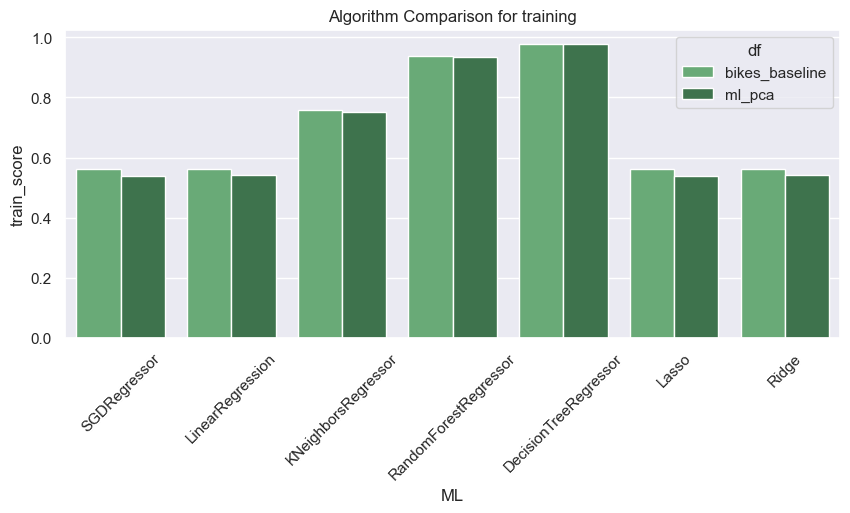

In [565]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison for training')
sns.barplot(data=score_df, x='ML', y='train_score', palette='Greens_d', hue='df')

plt.show()

**From the training score we have 3 potentiels ML: decisionTreeRegressor,  RandomForestRegressor  and maybe KNNRegressor. Let's see the others metrics.** 

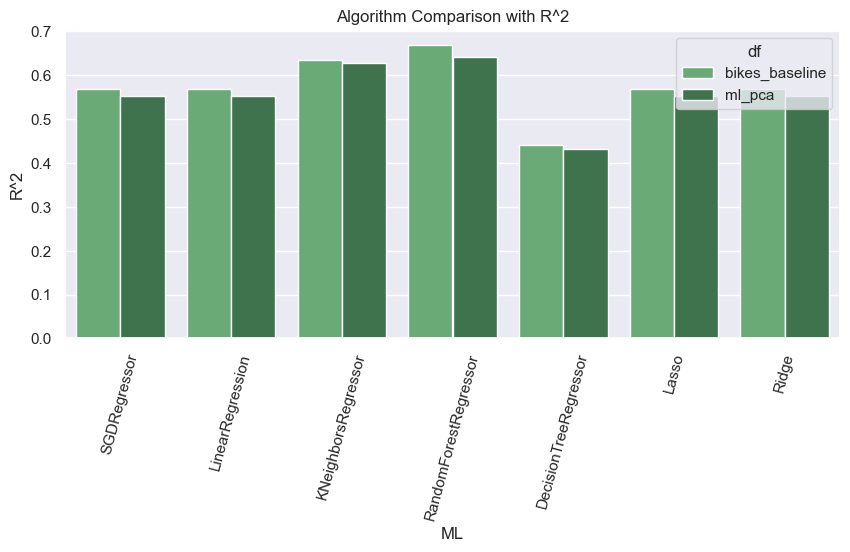

In [566]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
plt.title('Algorithm Comparison with R^2')
sns.barplot(data=score_df, x='ML', y='R^2', palette='Greens_d', hue='df')

plt.show()

**It can be seen that the 2 first models are clearly overfitting (the model fits the training too well (score =0.9377 for the training set for random forest) but it does not work as well for the test set (unseen data). In our example,  0.6631 for the testing set.<br>DecisionTreeRegressor is having a less adaptation to the testing set than KNR and RandomForest.So these two will likely be selected. This will be confirmed with the MSE**

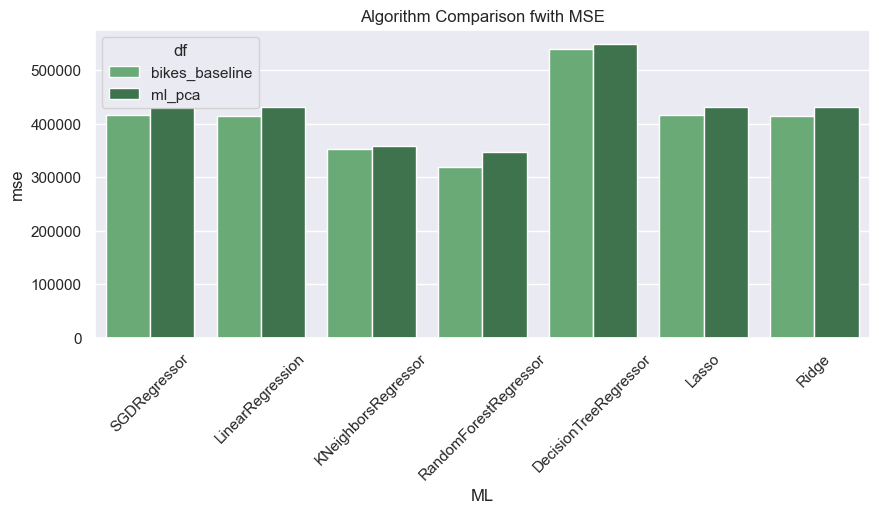

In [567]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison fwith MSE')
sns.barplot(data=score_df, x='ML', y='mse', palette='Greens_d', hue='df')

plt.show()

**The MSE confirm that KNeighborsRegressor and RandomForestRegressor are the best choices for this dataset.<br> The PCA dataframe always has a lesser scoring than the cleaned dataset. a reason for this could be that PCA is used there are many features (over a hundred). Here in the current dataframe there are less than forty. <br>
This is another clue to why the model overfitting  and it is not learning well. It needs to more information.<br> The model's hyperparameters will be adjusted to assess if this improves the models is helping.<br> The next step of the Machine learning will be done on the cleaned dataframe, before PCA** 

## KNN Regressor

K-Nearest Neighbors or KNN is a supervised machine learning algorithm and it can be used for classification and regression problems. KNN utilizes the entire dataset. Based on k neighbors value and distance calculation method (Minkowski, Euclidean, etc.), the model predicts the elements. The KNN regressor uses a mean or median value of k neighbors to predict the target element.

In [568]:
print("\033[1;32m first rows names in bikes_baseline dataframe \n")

 first rows names in bikes_baseline dataframe 



In [569]:
X = bikes_baseline
y= target
X.head()

ratio_hum  t1_scaled  weather_1  weather_2  weather_3  ...  period_6  \
0       0.93   0.152542          0          0          1  ...         0   
1       0.93   0.152542          1          0          0  ...         0   
2       0.96   0.135593          1          0          0  ...         0   
3       1.00   0.118644          1          0          0  ...         0   
4       0.93   0.118644          1          0          0  ...         0   

   holiday_0  holiday_1  wk_0  wk_1  
0          1          0     0     1  
1          1          0     0     1  
2          1          0     0     1  
3          1          0     0     1  
4          1          0     0     1  

[5 rows x 37 columns]

### Effect of the sample size in cross-validation

"The ShuffleSplit cross-validation technique is a popular method for evaluating machine learning models. The idea behind ShuffleSplit is to split the data into a training set randomly and a test set, then train the model on the training set and evaluate it on the test set. This process is repeated multiple times, and the average performance of the model is used as its final score. ShuffleSplit is particularly useful for large datasets, where it can be computationally prohibitive to run multiple train/test splits. In addition, by randomly splitting the data, ShuffleSplit ensures that every example in the dataset is given a chance to be in the training set, which helps to minimize bias."(Kumar)

source: https://vitalflux.com/k-fold-cross-validation-python-example/

In [570]:
train_sizes = np.array([0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
train_sizes

array([0.99, 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.5 ])

In [571]:
cv = ShuffleSplit(n_splits=10, random_state=42)

In [572]:
results = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=10)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

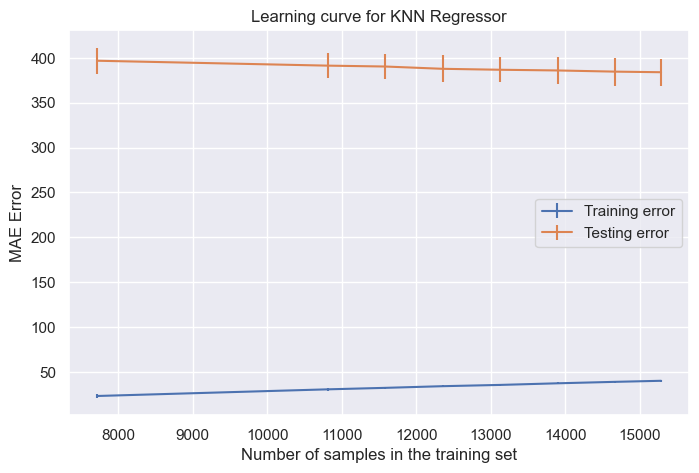

In [419]:
plt.figure(figsize=(8,5))
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("MAE Error")
_ = plt.title("Learning curve for KNN Regressor")

The number of samples for this dataset is 17155.
Whatever Ratio is used, the model does not appear to be learning, is highly biased and overfitting. The hyperparameters will be adjusted and the model assessed for improvement.<br>  From the learning curve the dataset is to be split into 3 parts. 
The testing set will be 10% of the dataset. The training set will be 90% of and the validation set will be 10% of that split.
This is a good option to avoid any leakage of the information to the testing set as the model is tuned. 

<img src="validation.png">

In [159]:
X=bikes_baseline
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X=X_train
y= y_train

# validation is now 15% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [160]:
print(f'percentage of each set in the entire datset after spliting: \n the training set is :',int((X_train.shape[0]/bikes_baseline.shape[0])*100),'% \n'
      'the testing set is:',int((X_test.shape[0]/bikes_baseline.shape[0])*100),'% \n'
      'the validation is set:',int((X_val.shape[0]/bikes_baseline.shape[0])*100),'% \n')

percentage of set of the entire datset after spliting: 
 the training set is : 80 % 
the testing set is: 10 % 
the validation is set: 9 % 



In [161]:
round((X_train.shape[0]/bikes_baseline.shape[0])*100, 1)

81.0

In [162]:
X=bikes_baseline
y= target
model = KNeighborsRegressor(n_neighbors=5)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [164]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [165]:
acc = model.score(X_test, y_test)
print("Accuracy: ", acc*100)
print("RMS Error: ", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4))

Accuracy:  63.39699233901192
RMS Error:  593.8011


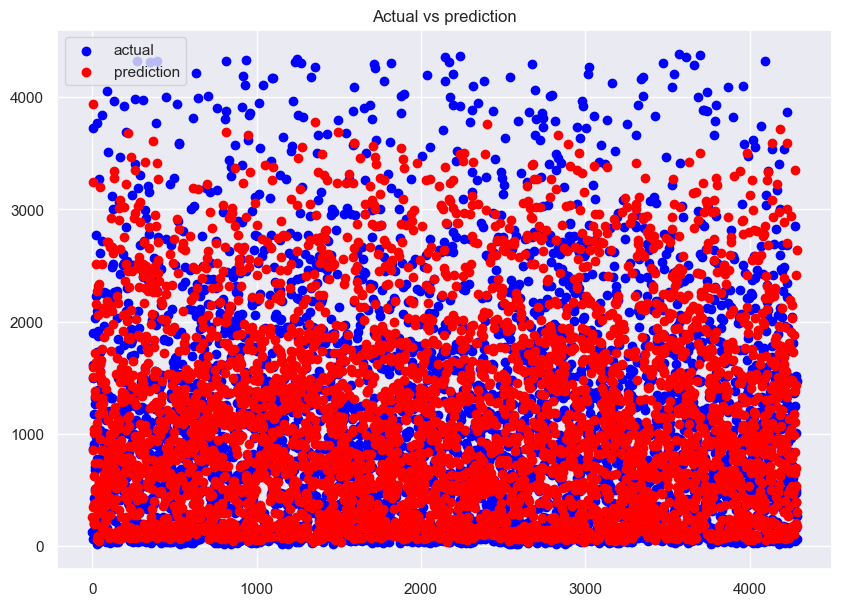

<Figure size 1000x600 with 0 Axes>

In [166]:
def plotGraph(y_test,y_pred,KNNR): 
    plt.scatter(range(len(y_test)), y_test, color='blue', label = 'actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label = 'prediction')
    plt.title(KNNR)
    plt.legend(loc="upper left")
    plt.figure(figsize=(10,6))
    plt.show()
    return

plotGraph(y_test, y_pred, "Actual vs prediction")

**The prediction versus actual is close however not accurate.**  

### Choose the K fold 

**Values for K folds in Cross Validation:**
Larger K means less bias towards overestimating the true expected error (as training folds will be closer to the total dataset) but higher variance and higher running time (as you are getting closer to the limit case: Leave-One-Out CV).

"The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller" (Kuhn and Johnson)

"To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." (Gareth Michael James et al.)

In [167]:
X=bikes_baseline
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X=X_train
y= y_train

# validation is now 15% of the initial data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [168]:
# evaluate the model using a given test condition
def evaluate_model(cv):
    scores = - cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=10)
    return scores.mean(), scores.min(), scores.max() 

In [169]:
# define folds to test
folds = range(2,51)

Next, the model performance can be calculated using the LOOCV procedure. (Chen, 2012)

In [170]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: 385.864


Each value can then be evaluated and the results stored.

In [171]:
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, random_state=42, shuffle=True)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, MAE=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, MAE=406.793 (401.704,411.883)
> folds=3, MAE=398.048 (391.951,404.510)
> folds=4, MAE=395.529 (381.750,404.665)
> folds=5, MAE=391.810 (381.323,401.255)
> folds=6, MAE=390.914 (382.143,402.740)
> folds=7, MAE=389.243 (372.910,400.088)
> folds=8, MAE=389.205 (370.296,406.701)
> folds=9, MAE=389.075 (377.830,416.548)
> folds=10, MAE=387.785 (371.995,404.034)
> folds=11, MAE=389.638 (370.619,398.741)
> folds=12, MAE=388.644 (370.734,405.839)
> folds=13, MAE=387.309 (367.504,411.452)
> folds=14, MAE=387.272 (364.547,402.077)
> folds=15, MAE=386.603 (368.753,405.866)
> folds=16, MAE=387.441 (364.921,411.341)
> folds=17, MAE=387.008 (365.726,408.909)
> folds=18, MAE=386.439 (366.530,421.612)
> folds=19, MAE=385.791 (364.889,416.974)
> folds=20, MAE=386.177 (369.614,414.583)
> folds=21, MAE=386.322 (353.678,417.701)
> folds=22, MAE=386.556 (355.075,416.384)
> folds=23, MAE=386.368 (356.527,414.338)
> folds=24, MAE=386.115 (354.441,411.891)
> folds=25, MAE=386.498 (359.187,421.567)


Finally, the results can be plotted for interpretation.

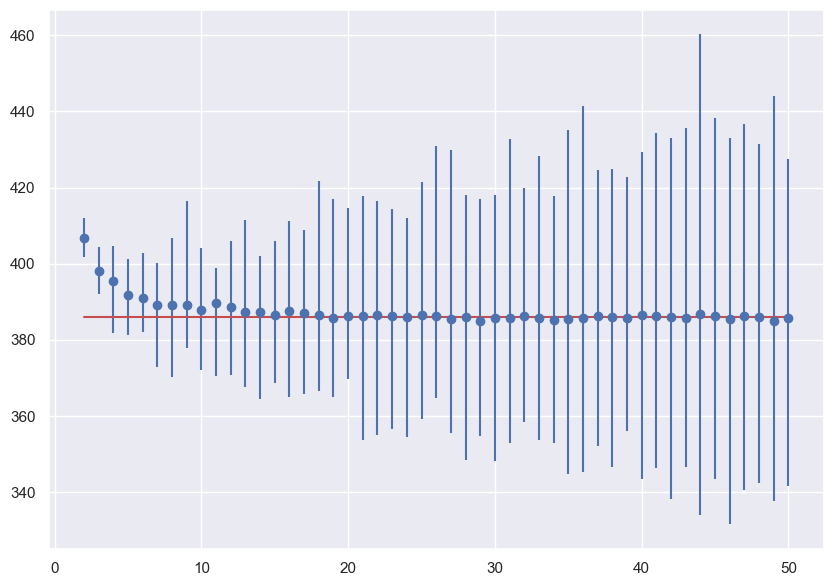

In [172]:
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

**The results suggest that for this model on this dataset, most k values overestimate the performance of the model compared to the ideal case. The results suggest that perhaps k=10 alone is not the best one. After 13 cross validation the model is close to the ideal result. So k=15 is chosen. This might be a more accurate estimate.
The model's performance may be improved by tuning the hyperparameters.**

### Tuning the hyperparametres 

In [173]:
X=bikes_baseline
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X=X_train
y= y_train

# validation is now 10% of the new dataframe
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=15, shuffle=False)

#### The nearest neighbors parameters alone 

In [174]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 717.6997114909033
RMSE value for k=  2 is: 631.4902066690196
RMSE value for k=  3 is: 597.1905644380362
RMSE value for k=  4 is: 589.3051409665288
RMSE value for k=  5 is: 586.148079554562
RMSE value for k=  6 is: 580.8248934773129
RMSE value for k=  7 is: 575.5841026733395
RMSE value for k=  8 is: 577.3619691749009
RMSE value for k=  9 is: 575.0300497448685
RMSE value for k=  10 is: 573.5908616188319
RMSE value for k=  11 is: 573.5706447526336
RMSE value for k=  12 is: 571.3529062196801
RMSE value for k=  13 is: 571.1139857882739
RMSE value for k=  14 is: 572.1394119223677
RMSE value for k=  15 is: 572.8235541332988
RMSE value for k=  16 is: 576.2310252978147
RMSE value for k=  17 is: 578.0580647922526
RMSE value for k=  18 is: 578.9701945161687
RMSE value for k=  19 is: 581.5536653083149
RMSE value for k=  20 is: 583.1163489303486
RMSE value for k=  21 is: 583.0365856475502
RMSE value for k=  22 is: 584.6414622193836
RMSE value for k=  23 is: 585.912165676024

In [573]:
print("\033[1;32m plotting the rmse values against k values \n")

 plotting the rmse values against k values 



<AxesSubplot:>

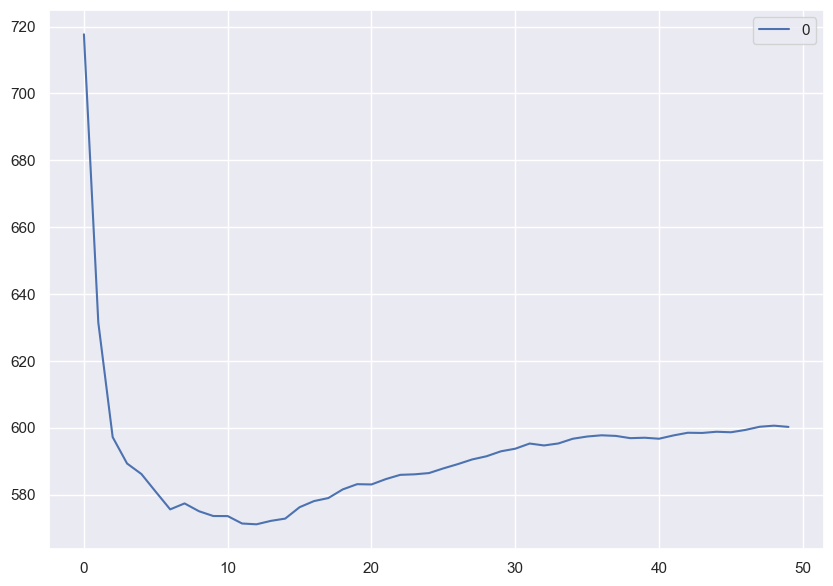

In [175]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

**An elbow curve can be seen above. From this it can be deduced that ideal K fold = 13. All hyperparameters will be assessed to verify the results.**

#### tuning the hyperparameters using Pipeline and GridSearchCV 

In [176]:
X=bikes_baseline
y= target

# test is now 10% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X=X_train
y= y_train

# validation is now 10% of the new dataframe
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=15, shuffle=False)
model = KNeighborsRegressor()

In [177]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [178]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [179]:
# Create a pipeline
pipe = Pipeline([("classifier", KNeighborsRegressor())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [KNeighborsRegressor()],
                 "classifier__n_neighbors": [3, 8, 10, 11, 12, 13, 14, 20],
                 "classifier__weights": ['uniform','distance'], 
                 "classifier__metric": ['minkowski','euclidean','manhattan'],
                 "classifier__algorithm": ['auto','brute']
                 },
                {"classifier": [KNeighborsRegressor()],
                 "classifier__n_neighbors": [3, 8, 10, 11, 12, 13, 14, 20],
                 "classifier__weights": ['uniform','distance'], 
                 "classifier__metric": ['minkowski'],
                 "classifier__p": [2, 3, 4, 5, 10, 25 ],
                 "classifier__algorithm": ['auto','brute']
                 }]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=cv, verbose=0,n_jobs=10) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [180]:
#print best parameters after tuning
print("Results from Grid Search: " )
print('Best parametres: ', gridsearch.best_params_) 
grid_predictions = gridsearch.predict(X_val)
bestscore = gridsearch.best_score_
print("\n The best score across ALL searched parameters:",round(bestscore, 2))

Results from Grid Search: 
Best parametres:  {'classifier': KNeighborsRegressor(n_neighbors=11), 'classifier__algorithm': 'auto', 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}

 The best score across ALL searched parametres: 0.65


### Prediction with all parameters and the testing set 

In [574]:
X=bikes_baseline
y= target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=15, shuffle=False)

model = KNeighborsRegressor( n_neighbors=11,
                            weights='distance',
                            algorithm='auto',
                            p=2,
                            metric='manhattan',
                            metric_params=None,
                            n_jobs=10)

Training accuracy: 0.9733708828505587
Testing accuracy: 0.6488092969729655


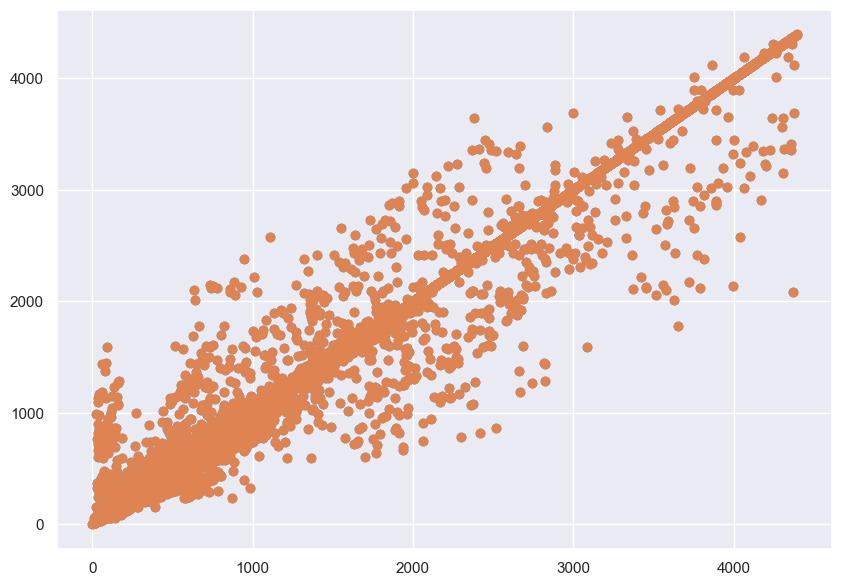

In [575]:
model.fit(X_train, y_train)

print("Training accuracy:",model.score(X_train, y_train)) 
print("Testing accuracy:",model.score(X_test, y_test))
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

plt.scatter(y_train,y_pred_train);
plt.scatter(y_train,y_pred_train);

In [577]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred)),4))

print('Train Data Score:', round(model.score(X_train, y_train),4))
print('Test Data Score:', round(model.score(X_test, y_test),4))

Mean Absolute Error: 414.791
Mean Squared Error: 360303.0777
Root Mean Squared Error: 600.2525
Train Data Score: 0.9734
Test Data Score: 0.6488


In [580]:
print('Improvement of {:0.2f}%.'.format(
    100 * (mean_absolute_error(y_test, y_pred) - 385.864) / 385.864))

Improvement of 7.50%.


**With an improvement of 7.5%, this machine learning model is not a good fit for this dataset. <br> Therefore the Random Forest Regressor model will be assessed for its performance in predicting the number of bike rentals.**

## Random Forest

Random Forest grows multiple decision trees which are merged together for a more accurate prediction.

The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.

Source: https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

### Effect of the sample size in cross-validation - 15% for Testing Data and and 85% for Training Data

Source: https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_learning_curve.html

In [183]:
data = bikes_baseline
target2 = target
target2 *= 100  

In [184]:
print(data,target2)

       ratio_hum  t1_scaled  weather_1  weather_2  weather_3  ...  period_6  \
0           0.93   0.152542          0          0          1  ...         0   
1           0.93   0.152542          1          0          0  ...         0   
2           0.96   0.135593          1          0          0  ...         0   
3           1.00   0.118644          1          0          0  ...         0   
4           0.93   0.118644          1          0          0  ...         0   
...          ...        ...        ...        ...        ...  ...       ...   
17150       0.81   0.220339          0          0          1  ...         0   
17151       0.81   0.220339          0          0          0  ...         1   
17152       0.78   0.237288          0          0          0  ...         1   
17153       0.76   0.237288          0          0          0  ...         1   
17154       0.76   0.220339          0          1          0  ...         1   

       holiday_0  holiday_1  wk_0  wk_1  
0        

**Checking the datasets are stored correctly into Data and Target.**

In [185]:
regressor = RandomForestRegressor(n_estimators=100, # The number of trees in the forest.
                                 random_state=42)

**Using the default parameters of the Random Forest Regressor.**

In [186]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.15)

**Setting the cross-validation to assess our predictive model. We are using 15% ofr the Test Data as is the split that was showing the best Root Mean Square Error based on the previous comparison between the machine learning model in Linear Regression.**

In [187]:
import numpy as np
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

**Computing the learning curve for a decision tree and vary the proportion of the training set from 10% to 100%. Also setting the number of samples for training of 5 to reduce the proccesing power of the model.**

In [188]:
from sklearn.model_selection import learning_curve

results = learning_curve(
    regressor, data, target2, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=30)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

**Defining for the learning curve, the data (independent variable), the target (dependent variable) and the traning and test datasets to understand the errors from each one of them.**

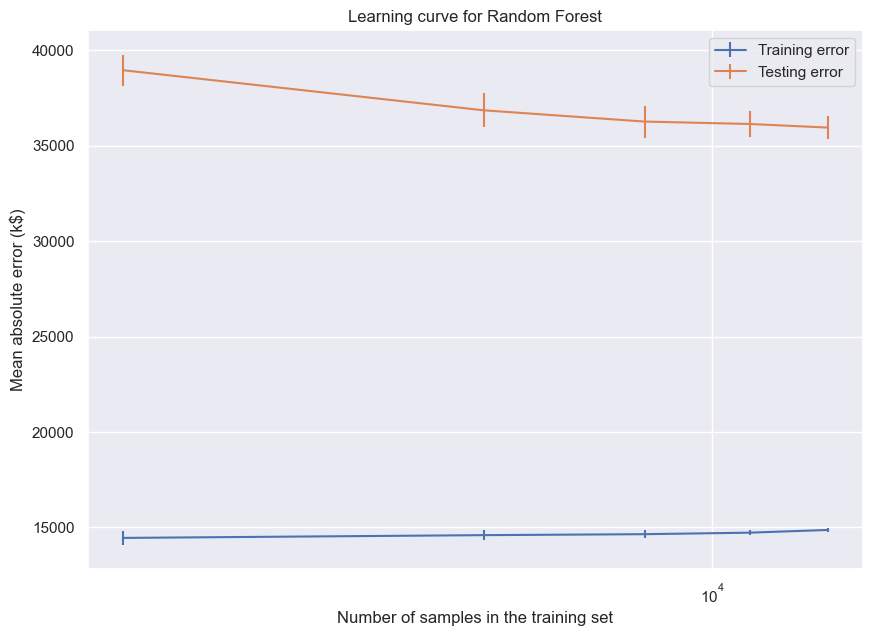

In [189]:
import matplotlib.pyplot as plt

plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing error")
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for Random Forest")

**By looking at the graph we can state the testing error it has a trend of going down and our goal it should be to achieve a learning curve where the testing error reachs to 0 to be the most accurate model. At this point the training error is overfitting the testing error.**

### Training and predicting with the Randon Forest model and Tuning the Hyperparamenters

Source: https://medium.com/@johnpace-32927/using-grid-search-to-find-optimal-hyperparameters-for-random-forests-7ea8a459ab76

**The hyperparameters of the model will be tuned to improve the learning curve as well as increasing the model accuracy, meaning having higher numbers the most closer to 1 in the Test Score for a model improvement.**

In [190]:
X2 = bikes_baseline
y2 = target
#y2 = np.array(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2.values.ravel(), test_size=0.15, random_state=42)

#values will give the values in a numpy array (shape: (n,1)
#ravel will convert that array shape to (n, ) (i.e. flatten it)

In [191]:
bikes_baseline.head()

ratio_hum  t1_scaled  weather_1  weather_2  weather_3  ...  period_6  \
0       0.93   0.152542          0          0          1  ...         0   
1       0.93   0.152542          1          0          0  ...         0   
2       0.96   0.135593          1          0          0  ...         0   
3       1.00   0.118644          1          0          0  ...         0   
4       0.93   0.118644          1          0          0  ...         0   

   holiday_0  holiday_1  wk_0  wk_1  
0          1          0     0     1  
1          1          0     0     1  
2          1          0     0     1  
3          1          0     0     1  
4          1          0     0     1  

[5 rows x 37 columns]

In [192]:
target.head()

cnt
0  18200
1  13800
2  13400
3   7200
4   4700

**Store the dataset (except the bike count "cnt") in X and store the target variable, the bike count column (cnt) into y. Splitting dataset into Training Set and Test Set. 15% for testing and random_state simply sets a seed to the random generator.**

In [193]:
print("Shape of training and testing data along with its labels:", X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

Shape of training and testing data along with its labels: (14581, 37) (2574, 37) (14581,) (2574,)


In [194]:
print(X2,y2)

       ratio_hum  t1_scaled  weather_1  weather_2  weather_3  ...  period_6  \
0           0.93   0.152542          0          0          1  ...         0   
1           0.93   0.152542          1          0          0  ...         0   
2           0.96   0.135593          1          0          0  ...         0   
3           1.00   0.118644          1          0          0  ...         0   
4           0.93   0.118644          1          0          0  ...         0   
...          ...        ...        ...        ...        ...  ...       ...   
17150       0.81   0.220339          0          0          1  ...         0   
17151       0.81   0.220339          0          0          0  ...         1   
17152       0.78   0.237288          0          0          0  ...         1   
17153       0.76   0.237288          0          0          0  ...         1   
17154       0.76   0.220339          0          1          0  ...         1   

       holiday_0  holiday_1  wk_0  wk_1  
0        

**Checking the datasets are stored correctly into X and y.**

In [195]:
rfr = RandomForestRegressor(n_estimators=100, # The number of trees in the forest.
                            random_state=42)
#max_depth=20, # The maximum depth of the tree.
#verbose=0, # Controls the verbosity when fitting and predicting.
#bootstrap=True) # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. 
rfr.fit(X_train2, y_train2)
y_pred2 = rfr.predict(X_test2)

**Fitting the model on train data and predicting on the test data.**

In [196]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test2, y_pred2),4))
print('Mean Squared Error:', round(mean_squared_error(y_test2, y_pred2),4))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test2, y_pred2)),4))

print('Train Data Score:', round(rfr.score(X_train2, y_train2),4))
print('Test Data Score:', round(rfr.score(X_test2, y_test2),4))

Mean Absolute Error: 35281.0537
Mean Squared Error: 3090412925.1771
Root Mean Squared Error: 55591.4825
Train Data Score: 0.9369
Test Data Score: 0.6807


Regression metrics.
Source: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [197]:
cv_score = cross_val_score(rfr, X2, y2.values.ravel(), cv = 3)

print("Cross Validation Mean Score: ", cv_score.mean())

Cross Validation Mean Score:  0.6451199174327537


**The Test Data and the cross validation tested over 3 shuffles of data the scores are quite poor, this may be improved further by tuning the hyperparameters to achieve better model predictions.**

### Improving hyperparameters

In [198]:
from sklearn.model_selection import GridSearchCV

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**Examining the default values of random forest.**

### Random Search with Cross Validation

In [199]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


**Creating random hyperparameter grid to sample from during fitting.**

In [200]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 10)
# Fit the random search model
rfr_random.fit(X_train2, y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**Instantiate (meaning: Represent as or by an instance) the random search and fit it in the model.**

In [201]:
rfr_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

**Best parameters from fitting the random search.**

In [202]:
def evaluate(model, X_test2, y_test2):
    predictions = model.predict(X_test2)
    errors = abs(predictions - y_test2)
    mape = 100 * np.mean(errors / y_test2)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

**Evaluate Random Search. Comparing the base model with the best random search model.**

In [203]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train2, y_train2)
base_accuracy = evaluate(base_model, X_test2, y_test2)

Model Performance
Average Error: 35281.0537 degrees.
Accuracy = -0.71%.


In [204]:
y_pred3 = base_model.predict(X_test2)
mae = round(mean_absolute_error(y_test2,y_pred3),4)
print ("Mean absolut error for the default model:", mae)

Mean absolut error for the default model: 35281.0537


**Evaluate the Default Model and checking the model accuracy by calculating the mean value on the errors of the model.**

In [205]:
best_random = rfr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test2, y_test2)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 34721.8429 degrees.
Accuracy = 0.57%.
Improvement of -179.80%.


**Evaluate the Best Random Search Model. After applying the new parameters the accuracy has improved in %.**

In [206]:
y_pred3 = best_random.predict(X_test2)

In [207]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test2, y_pred3),4))
print('Mean Squared Error:', round(mean_squared_error(y_test2, y_pred3),4))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test2, y_pred3)),4))

print('Train Data Score:', round(best_random.score(X_train2, y_train2),4))
print('Test Data Score:', round(best_random.score(X_test2, y_test2),4))

Mean Absolute Error: 34721.8429
Mean Squared Error: 2774339119.216
Root Mean Squared Error: 52671.9956
Train Data Score: 0.7995
Test Data Score: 0.7134


**Evaluating the Test Data Score after applying the Best Random Search Model.**

### Grid Search

**Grid Search technique helps in performing exhaustive search over specified parameter (hyper parameters) values for an estimator.**

**Performing grid search building on the result from the random search. Also testing a range of hyperparameters around the best values returned by random search.**

In [208]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000, 1600]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 10, verbose = 2, return_train_score=True)

In [209]:
# Fit the grid search to the data
grid_search.fit(X_train2, y_train2);

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [210]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [211]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test2, y_test2)

Model Performance
Average Error: 35996.4071 degrees.
Accuracy = -12.33%.


In [212]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1638.20%.


**Evaluate the Best Model from Grid Search.**

In [213]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs =10, verbose = 2, return_train_score=True)

grid_search_final.fit(X_train2, y_train2);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


**Another round of Grid Search will be performed to assess if the accuracy can be improved.**

In [214]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [215]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, X_test2, y_test2)

Model Performance
Average Error: 37164.0578 degrees.
Accuracy = -15.67%.


In [216]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of 2109.75%.


In [217]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model,  X_test2, y_test2)

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 35996.4071 degrees.
Accuracy = -12.33%.


## Conclusion 

 **The Randon Forest Regressor coupled with Random Search is the best model for this datasetso far. The final result: Train Data Score: 0.7995 and Test Data Score: 0.7134. By tuning the hyperparameters, the model is not overfitting. <br>Some of the ways to improve the results are as follows:<br>Add more data: Collect more training data; This may not always help, though as adding more data may result in noise. In this case, more weather related data such as precipitation is needed as a higher correlation may be seen with the number of bikes rented. <br>
With only have nine features before hot encoding, there is the option to make the model more complex.<br> Look for other Regressor model as the KNregressor was not performing as well as expected**  